# 1.Import library

In [511]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import Binarizer
from sklearn.metrics import f1_score, roc_curve , auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import graphviz


from statsmodels.api import Logit
from statsmodels.api import qqplot,add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor


from scipy import stats


from imblearn.combine import *
from imblearn.under_sampling import *
from imblearn.over_sampling import *
from imblearn.over_sampling import SMOTE


# import lightgbm as lgb
import lightgbm
from lightgbm import LGBMClassifier, plot_importance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

In [512]:
# 한글패치
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
fontname = 'NanumGothic.ttf' 
fontname = font_manager.FontProperties(fname=fontname).get_name()
plt.style.use('seaborn-white')
rc('font', family=fontname) 

# 2.탐색적분석

In [614]:
df_new_p = pd.read_csv('final_personal.csv')
df_new_p = df_new_p.drop(['Unnamed: 0'],axis = 1,inplace = False)  
df_new_p.head()

,고객ID,고객유형,생년,거주지,시,구군,남여구분,판매유형,계약유형,유통경로,...,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부,연령대,계정수
0,66758234,개인,1979,경기도,경기도,평택시,여자,렌탈,일반,방문판매,...,DES-1,96900,계약확정,0,없음,9,새마을금고,정상,30,1
1,66755948,개인,1982,경기도,경기도,평택시,남자,렌탈,교체렌탈,방문판매,...,DES-1,102900,계약확정,0,없음,2,현대카드,정상,30,2
2,66755948,개인,1982,경기도,경기도,평택시,남자,렌탈,프로모션,방문판매,...,DES-3A,90900,계약확정,0,없음,2,현대카드,정상,30,2
3,66756657,개인,1973,경기도,경기도,평택시,여자,렌탈,일반,홈쇼핑,...,DES-1,96900,계약확정,0,없음,8,우리은행,정상,40,1
4,66423450,개인,1982,경기도,경기도,포천시,남자,멤버십,멤버십S,렌탈재계약,...,DES-1,66900,계약확정,0,없음,5,농협회원조합,정상,30,1


In [615]:
df_new_p.columns

Index(['고객ID', '고객유형', '생년', '거주지', '시', '구군', '남여구분', '판매유형', '계약유형', '유통경로',
       '계약일', '계약기간', '납부유형', '제품군', '월랜탈비용', '계약상태', '연체건수', '연체여부', '신용등급',
       '결제은행', '해약여부', '연령대', '계정수'],
      dtype='object')

# 범주형변수

In [571]:
obj_cols = df_new_p.select_dtypes('object').columns
obj_cols

Index(['고객유형', '거주지', '시', '구군', '남여구분', '판매유형', '계약유형', '유통경로', '계약일', '납부유형',
       '제품군', '계약상태', '연체여부', '결제은행', '해약여부'],
      dtype='object')

In [572]:
for col in obj_cols:
    _n = len(df_new_p[col].value_counts())
    print(col,':',str(_n))

고객유형 : 1
거주지 : 7
시 : 14
구군 : 230
남여구분 : 2
판매유형 : 2
계약유형 : 8
유통경로 : 9
계약일 : 101
납부유형 : 4
제품군 : 6
계약상태 : 4
연체여부 : 2
결제은행 : 45
해약여부 : 2


In [573]:
df_new_p['제품군'].unique()

array(['DES-1', 'DES-3A', 'DES-2', 'DES-R4', 'MMC', 'ERA'], dtype=object)

In [574]:
df_new_p['연령대'].value_counts()

30    17412
40    14408
50     8011
60     2677
20     2665
70      905
80      184
90        6
10        1
Name: 연령대, dtype: int64

# 단변수 그래프

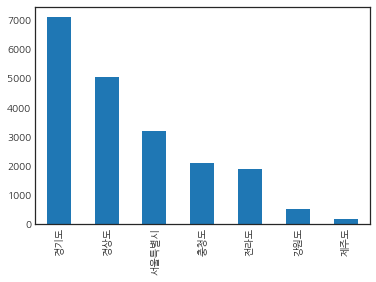

In [160]:
df_count = df_new_p['거주지'].value_counts()
df_count.plot.bar()

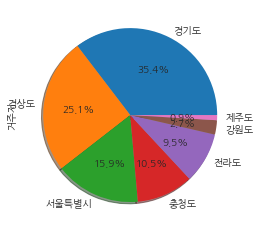

In [161]:
df_new_p['거주지'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

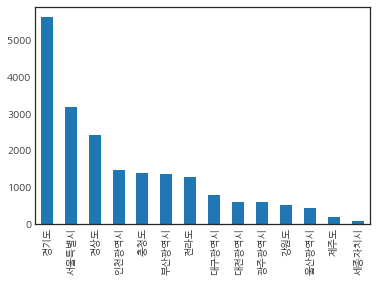

In [162]:
df_count = df_new_p['시'].value_counts()
df_count.plot.bar()

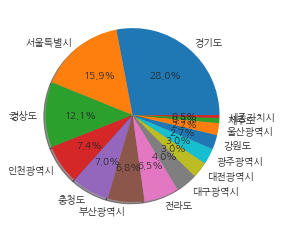

In [163]:
df_new_p['시'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

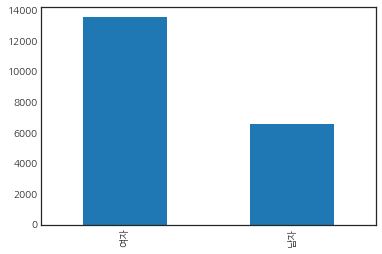

In [164]:
df_count = df_new_p['남여구분'].value_counts()
df_count.plot.bar()

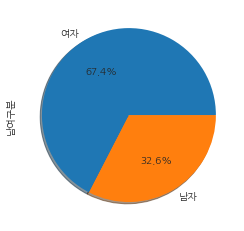

In [165]:
df_new_p['남여구분'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

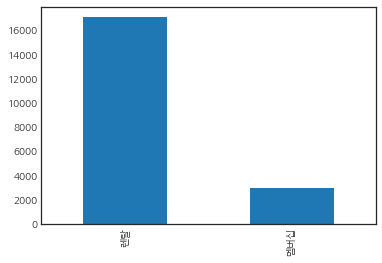

In [166]:
df_count = df_new_p['판매유형'].value_counts()
df_count.plot.bar()

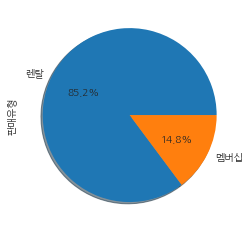

In [167]:
df_new_p['판매유형'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

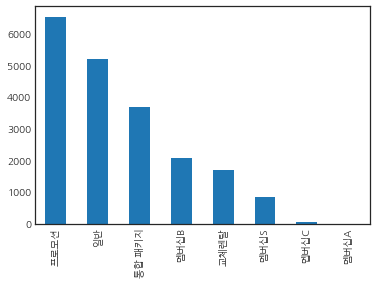

In [168]:
df_count = df_new_p['계약유형'].value_counts()
df_count.plot.bar()

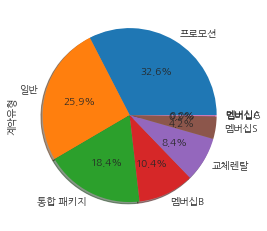

In [169]:
df_new_p['계약유형'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

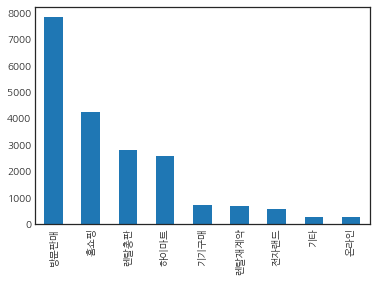

In [170]:
df_count = df_new_p['유통경로'].value_counts()
df_count.plot.bar()

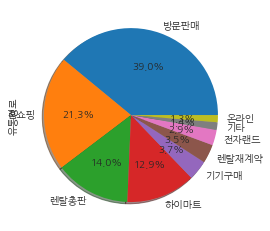

In [171]:
df_new_p['유통경로'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

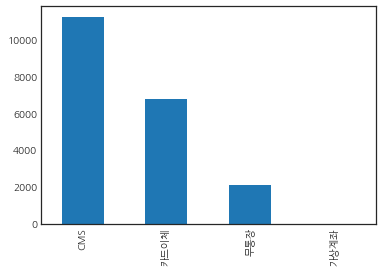

In [172]:
df_count = df_new_p['납부유형'].value_counts()
df_count.plot.bar()

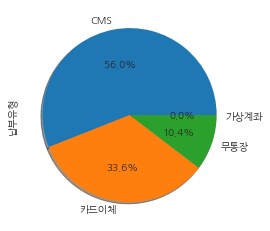

In [173]:
df_new_p['납부유형'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

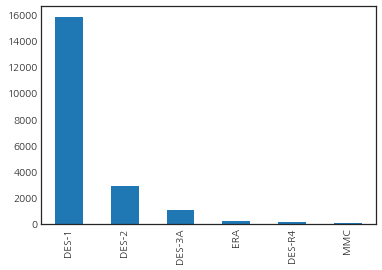

In [174]:
df_count = df_new_p['제품군'].value_counts()
df_count.plot.bar()

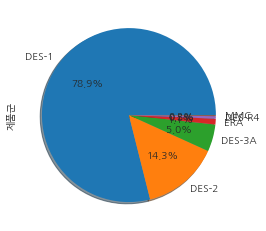

In [175]:
df_new_p['제품군'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

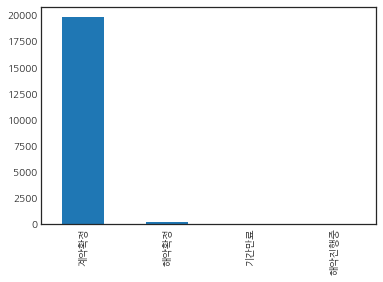

In [176]:
df_count = df_new_p['계약상태'].value_counts()
df_count.plot.bar()

# 불균형 데이터

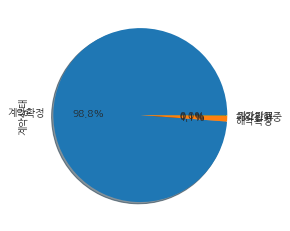

In [177]:
df_new_p['계약상태'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

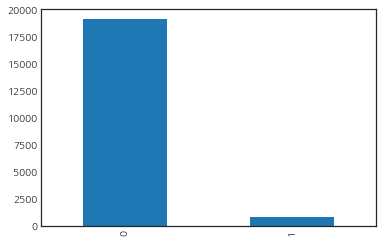

In [178]:
df_count = df_new_p['연체여부'].value_counts()
df_count.plot.bar()

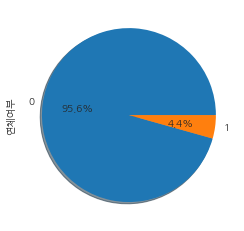

In [179]:
df_new_p['연체여부'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

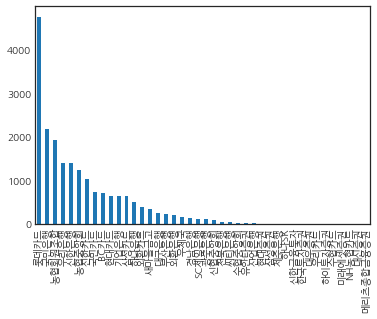

In [180]:
df_count = df_new_p['결제은행'].value_counts()
df_count.plot.bar()

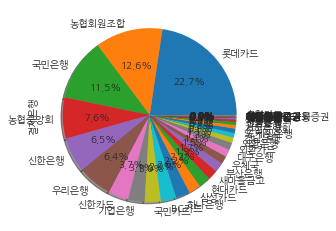

In [220]:
df_new_p['결제은행'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()
# 국민은행

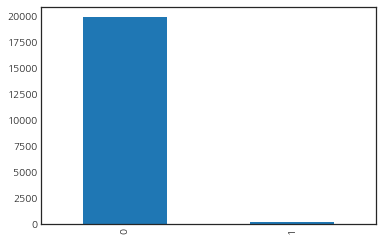

In [182]:
df_count = df_new_p['해약여부'].value_counts()
df_count.plot.bar()

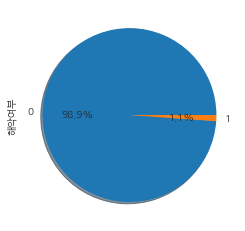

In [183]:
df_new_p['해약여부'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

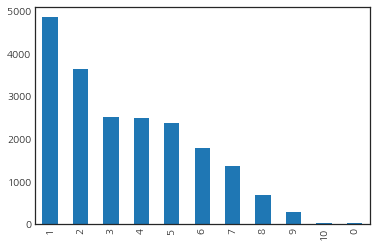

In [184]:
df_count = df_new_p['신용등급'].value_counts()
df_count.plot.bar()

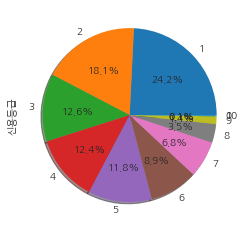

In [185]:
df_new_p['신용등급'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

# 해약여부에 따른 범주형 변수 그래프

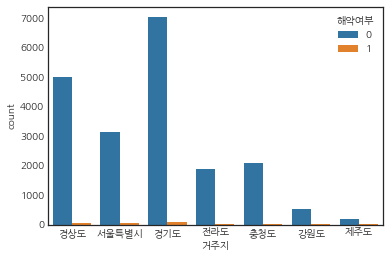

In [186]:
sns.countplot('거주지',hue='해약여부',data=df_new_p)
plt.show()

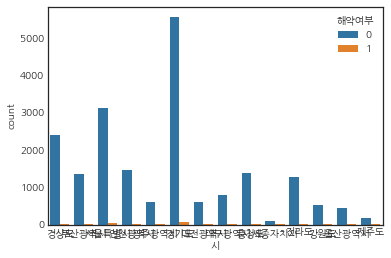

In [187]:
sns.countplot('시',hue='해약여부',data=df_new_p)
plt.show()

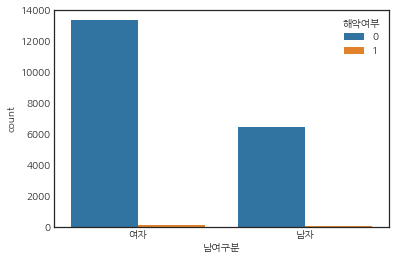

In [188]:
sns.countplot('남여구분',hue='해약여부',data=df_new_p)
plt.show()

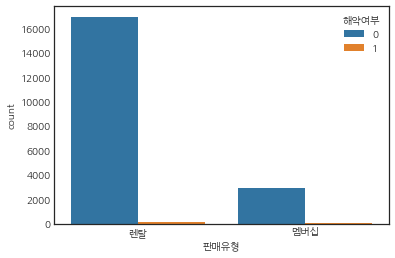

In [189]:
sns.countplot('판매유형',hue='해약여부',data=df_new_p)
plt.show()

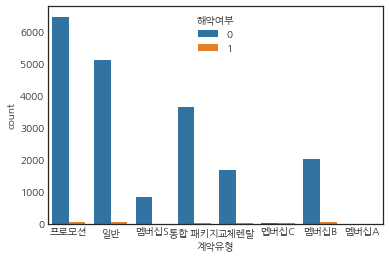

In [190]:
sns.countplot('계약유형',hue='해약여부',data=df_new_p)
plt.show()

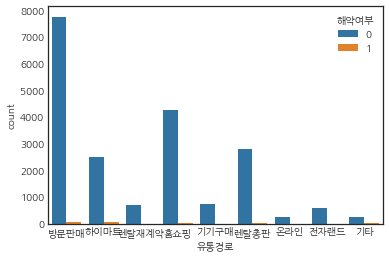

In [191]:
sns.countplot('유통경로',hue='해약여부',data=df_new_p)
plt.show()

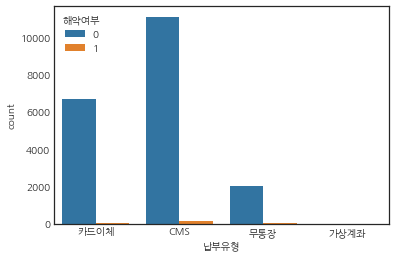

In [192]:
sns.countplot('납부유형',hue='해약여부',data=df_new_p)
plt.show()

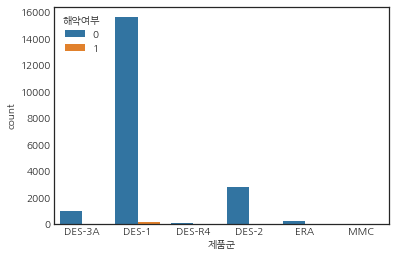

In [193]:
sns.countplot('제품군',hue='해약여부',data=df_new_p)
plt.show()

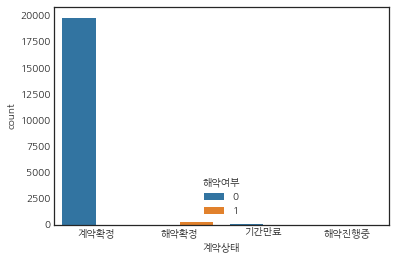

In [194]:
sns.countplot('계약상태',hue='해약여부',data=df_new_p)
plt.show()

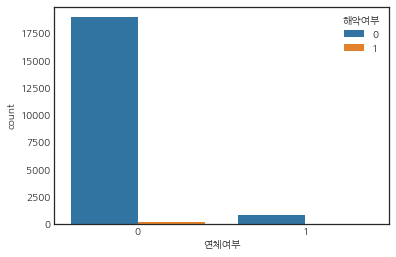

In [195]:
sns.countplot('연체여부',hue='해약여부',data=df_new_p)
plt.show()

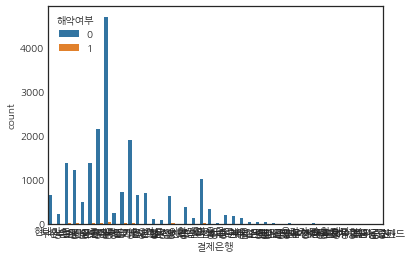

In [196]:
sns.countplot('결제은행',hue='해약여부',data=df_new_p)
plt.show()

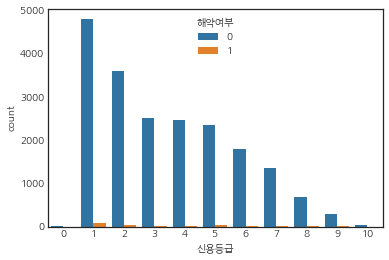

In [197]:
sns.countplot('신용등급',hue='해약여부',data=df_new_p)
plt.show()

# 카이제곱 검정

In [198]:
df_new_p.columns

Index(['고객ID', '고객유형', '생년', '거주지', '시', '구군', '남여구분', '판매유형', '계약유형', '유통경로',
       '계약일', '계약기간', '납부유형', '제품군', '월랜탈비용', '계약상태', '연체건수', '연체여부', '신용등급',
       '결제은행', '해약여부', '연령대', '계정수'],
      dtype='object')

In [199]:
a = pd.crosstab(df_new_p['고객유형'], df_new_p['해약여부'], margins=True)
a

해약여부,0,1,All
고객유형,,,
개인,19855,222,20077
All,19855,222,20077


In [200]:
a = pd.crosstab(df_new_p['연체건수'], df_new_p['해약여부'], margins=True)
a

해약여부,0,1,All
연체건수,,,
0,18987,216,19203
1,360,2,362
2,154,1,155
3,70,0,70
4,35,0,35
5,37,0,37
6,3,0,3
7,24,2,26
8,30,0,30


In [127]:
# for i in 
# ci = [a.loc[i][0],a.loc[i][1]]

In [128]:
c1 = [a.loc[1][0],a.loc[1][1]]
c2 = [a.loc[7][0],a.loc[7][1]]
_, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2])
print(p_value)

0.8089792974833481


In [561]:
a = pd.crosstab(df_new_p['거주지'], df_new_p['해약여부'], margins=True)
a

해약여부,0,1,All
거주지,,,
강원도,1133,22,1155
경기도,16171,319,16490
경상도,11363,202,11565
서울특별시,7764,174,7938
전라도,4202,82,4284
제주도,380,9,389
충청도,4353,95,4448
All,45366,903,46269


In [565]:
c1 = [a.loc['강원도'][0],a.loc['강원도'][1]]
c2 = [a.loc['경기도'][0],a.loc['경기도'][1]]
c3 = [a.loc['경상도'][0],a.loc['경상도'][1]]
c4 = [a.loc['서울특별시'][0],a.loc['서울특별시'][1]]
c5 = [a.loc['전라도'][0],a.loc['전라도'][1]]
c6 = [a.loc['제주도'][0],a.loc['제주도'][1]]
c7 = [a.loc['충청도'][0],a.loc['충청도'][1]]
_, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2,c3,c4,c5,c6,c7])
print(p_value)

0.4164146766211434


두 집단가 이탈율 차이 없음

In [202]:
a = pd.crosstab(df_new_p['구군'], df_new_p['해약여부'], margins=True)
a

해약여부,0,1,All
구군,,,
가평군,16,0,16
강남구,235,1,236
강동구,145,2,147
강릉시,78,2,80
강북구,107,2,109
강서구,314,4,318
강진군,3,0,3
강화군,9,0,9
거제시,142,1,143


In [566]:
a = pd.crosstab(df_new_p['시'], df_new_p['해약여부'], margins=True)
a

해약여부,0,1,All
시,,,
강원도,1133,22,1155
경기도,13004,265,13269
경상도,5289,86,5375
광주광역시,1284,36,1320
대구광역시,1713,35,1748
대전광역시,1287,34,1321
부산광역시,3331,61,3392
서울특별시,7764,174,7938
세종자치시,187,2,189


In [568]:
c1 = [a.loc['경기도'][0],a.loc['경기도'][1]]
c2 = [a.loc['경상도'][0],a.loc['경상도'][1]]
_, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2])
print(p_value)

0.0805017236986514


두 집단간 이탈율 차이 없다.

In [203]:
a = pd.crosstab(df_new_p['남여구분'], df_new_p['해약여부'], margins=True)
a

해약여부,0,1,All
남여구분,,,
남자,6473,69,6542
여자,13382,153,13535
All,19855,222,20077


In [204]:
c1 = [a.loc['남자'][0],a.loc['남자'][1]]
c2 = [a.loc['여자'][0],a.loc['여자'][1]]
_, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2])
print('유의확률 : {:.3f}'.format(p_value))

유의확률 : 0.683


유의수준 0.05보다 작으므로 귀무가설(렌탈집단과 멤버십집단은 이탈율이 같다)을 기각할 수 있다.

즉, 두 집단의 이탈율은 다르다.

In [205]:
a = pd.crosstab(df_new_p['판매유형'], df_new_p['해약여부'], margins=True)
a

해약여부,0,1,All
판매유형,,,
렌탈,16955,149,17104
멤버십,2900,73,2973
All,19855,222,20077


In [206]:
c1 = [a.loc['렌탈'][0],a.loc['렌탈'][1]]
c2 = [a.loc['멤버십'][0],a.loc['멤버십'][1]]
_, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2])
print('유의확률 : {:.3f}'.format(p_value))

유의확률 : 0.000


유의수준 0.05보다 작으므로 귀무가설(렌탈집단과 멤버십집단은 이탈율이 같다)을 기각할 수 있다.

즉, 두 집단의 이탈율은 다르다. 

In [207]:
a = pd.crosstab(df_new_p['계약유형'], df_new_p['해약여부'], margins=True)
a

해약여부,0,1,All
계약유형,,,
교체렌탈,1670,11,1681
멤버십A,4,0,4
멤버십B,2030,55,2085
멤버십S,833,7,840
멥버십C,33,11,44
일반,5137,57,5194
통합 패키지,3666,24,3690
프로모션,6482,57,6539
All,19855,222,20077


In [208]:
c1 = [a.loc['일반'][0],a.loc['일반'][1]]
c2 = [a.loc['프로모션'][0],a.loc['프로모션'][1]]
_, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2])
print(p_value)

0.2528867989979607


일반과 프로모션간에 해지율 차이 없다.

In [209]:
a = pd.crosstab(df_new_p['유통경로'], df_new_p['해약여부'], margins=True)
a

해약여부,0,1,All
유통경로,,,
기기구매,735,9,744
기타,272,13,285
렌탈재계약,694,4,698
렌탈총판,2790,25,2815
방문판매,7755,82,7837
온라인,263,3,266
전자랜드,573,5,578
하이마트,2518,63,2581
홈쇼핑,4255,18,4273


In [210]:
c1 = [a.loc['방문판매'][0],a.loc['방문판매'][1]]
c2 = [a.loc['홈쇼핑'][0],a.loc['홈쇼핑'][1]]
_, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2])
print(p_value)

0.00042008612384035867


두집단간 해지율 차이 있다.

In [557]:
a = pd.crosstab(df_new_p['납부유형'], df_new_p['해약여부'], margins=True)
a

해약여부,0,1,All
납부유형,,,
CMS,28125,743,28868
가상계좌,1,0,1
무통장,2028,56,2084
카드이체,15212,104,15316
All,45366,903,46269


In [560]:
c1 = [a.loc['CMS'][0],a.loc['CMS'][1]]
c2 = [a.loc['가상계좌'][0],a.loc['가상계좌'][1]]
_, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2])
print(p_value)
c1

0.002743621223916532


[28125, 743]

CMS와 카드이체 간에 해지율 차이 있다.

In [212]:
a = pd.crosstab(df_new_p['제품군'], df_new_p['해약여부'], margins=True)
a

해약여부,0,1,All
제품군,,,
DES-1,15645,201,15846
DES-2,2853,18,2871
DES-3A,1008,3,1011
DES-R4,96,0,96
ERA,214,0,214
MMC,39,0,39
All,19855,222,20077


In [144]:
c1 = [a.loc['DES-1'][0],a.loc['DES-1'][1]]
c2 = [a.loc['DES-2'][0],a.loc['DES-2'][1]]
_, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2])
print(p_value)

7.229335120742381e-19


두집단간 차이 있다.

In [145]:
a = pd.crosstab(df_new_p['계약상태'], df_new_p['해약여부'], margins=True)
a

해약여부,정상,해약,All
계약상태,,,
계약확정,45324,0,45324
기간만료,29,0,29
해약진행중,13,0,13
해약확정,0,903,903
All,45366,903,46269


In [146]:
c1 = [a.loc['계약확정'][0],a.loc['계약확정'][1]]
c2 = [a.loc['해약확정'][0],a.loc['해약확정'][1]]
_, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2])
print(p_value)

0.0


두집단간 차이 있음

In [147]:
a = pd.crosstab(df_new_p['연체여부'], df_new_p['해약여부'], margins=True)
a

해약여부,정상,해약,All
연체여부,,,
없음,43592,865,44457
있음,1774,38,1812
All,45366,903,46269


In [148]:
c1 = [a.loc['있음'][0],a.loc['있음'][1]]
c2 = [a.loc['없음'][0],a.loc['없음'][1]]
_, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2])
print(p_value)

0.7112756348716217


유의수준 0.05보다 크므로 귀무가설(렌탈집단과 멤버십집단은 이탈율이 같다)을 기각할 수 없다.

즉, 두 집단의 이탈율은 같다.

In [149]:
a = pd.crosstab(df_new_p['결제은행'], df_new_p['해약여부'], margins=True)
a

해약여부,정상,해약,All
결제은행,,,
BC카드,1315,17,1332
NH농협카드,2,0,2
SC제일은행,369,9,378
SK증권,1,0,1
경남은행,375,6,381
광주은행,275,12,287
국민은행,5191,142,5333
국민카드,1374,14,1388
기업은행,1393,30,1423


In [150]:
c1 = [a.loc['롯데카드'][0],a.loc['롯데카드'][1]]
c2 = [a.loc['국민카드'][0],a.loc['국민카드'][1]]
_, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2])
print(p_value)

0.5997163894904669


롯데카드와 국민카드 그룹간 해지율 차이 없음

In [151]:
a = pd.crosstab(df_new_p['신용등급'], df_new_p['해약여부'], margins=True)
a

해약여부,정상,해약,All
신용등급,,,
0,61,0,61
1,11897,158,12055
2,8653,164,8817
3,5152,154,5306
4,5607,148,5755
5,4670,90,4760
6,4007,74,4081
7,2917,60,2977
8,1646,38,1684


In [152]:
c1 = [a.loc[1][0],a.loc[1][1]]
c2 = [a.loc[10][0],a.loc[10][1]]
_, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2])
print(p_value)

0.3975127807417709


1등급과 10등급 해지율 차이 없음

In [153]:
a = pd.crosstab(df_new_p['연령대'], df_new_p['해약여부'], margins=True)
a

해약여부,정상,해약,All
연령대,,,
10,1,0,1
20,2626,39,2665
30,17229,183,17412
40,14108,300,14408
50,7781,230,8011
60,2570,107,2677
70,872,33,905
80,174,10,184
90,5,1,6


In [154]:
c1 = [a.loc[20][0],a.loc[20][1]]
c2 = [a.loc[30][0],a.loc[30][1]]
_, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2])
print(p_value)

0.07240303224684551


# 연속형 변수

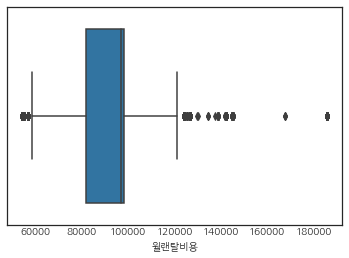

In [213]:
sns.boxplot(x=df_new_p['월랜탈비용'])

In [214]:
df_new_p.head()

,고객ID,고객유형,생년,거주지,시,구군,남여구분,판매유형,계약유형,유통경로,...,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부,연령대,계정수
13,66355286,개인,1986,경상도,경상도,포항시 북구,여자,렌탈,프로모션,방문판매,...,DES-3A,90900,계약확정,0,0,7,현대카드,0,20,1
18,66757035,개인,1989,경상도,부산광역시,해운대구,여자,렌탈,프로모션,하이마트,...,DES-1,96900,계약확정,0,0,4,부산은행,0,20,1
36,66758315,개인,1992,서울특별시,서울특별시,강남구,여자,렌탈,프로모션,방문판매,...,DES-1,105900,계약확정,0,0,6,우리은행,0,20,1
48,66670488,개인,1987,서울특별시,서울특별시,강서구,여자,렌탈,프로모션,방문판매,...,DES-1,96900,계약확정,0,0,4,우리은행,0,20,1
54,66758851,개인,1994,경기도,인천광역시,계양구,남자,렌탈,일반,방문판매,...,DES-R4,126900,계약확정,12,1,5,농협중앙회,0,20,1


In [616]:
two = df_new_p[df_new_p['연령대'] == 20]
three = df_new_p[df_new_p['연령대'] == 30]

In [617]:
tt = pd.concat([two,three])

In [620]:
# other = df_new_p[df_new_p['연령대'] != 20]
# other = other[other['연령대'] != 30]

In [622]:
other['연령대'].value_counts()

40    14408
50     8011
60     2677
70      905
80      184
90        6
10        1
Name: 연령대, dtype: int64

In [623]:
other.columns

Index(['고객ID', '고객유형', '생년', '거주지', '시', '구군', '남여구분', '판매유형', '계약유형', '유통경로',
       '계약일', '계약기간', '납부유형', '제품군', '월랜탈비용', '계약상태', '연체건수', '연체여부', '신용등급',
       '결제은행', '해약여부', '연령대', '계정수'],
      dtype='object')

In [74]:
other[other['유통경로']]

96025.11152567118

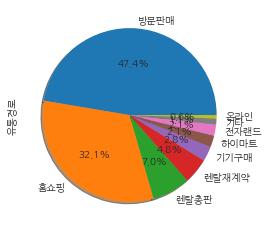

In [624]:
other['유통경로'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

In [148]:
a = pd.crosstab(tt['계약기간'], tt['해약여부'], margins=True)
a

해약여부,0,1,All
계약기간,,,
12,837,18,855
36,2291,56,2347
39,253,0,253
60,16474,148,16622
All,19855,222,20077


In [149]:
c1 = [a.loc[12][0],a.loc[12][1]]
c2 = [a.loc[36][0],a.loc[36][1]]
c3 = [a.loc[39][0],a.loc[39][1]]
c4 = [a.loc[60][0],a.loc[60][1]]

_, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2, c3, c4])
print(p_value)

1.954033714484514e-11


2-proportion 결과 20,30대 고객들의 계약기간에 따른 해지율 차이가 있다고 볼수 있다.

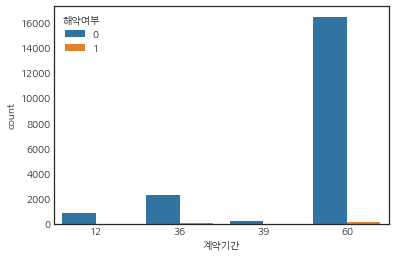

In [150]:
sns.countplot('계약기간',hue='해약여부',data = tt)
plt.show()

In [154]:
# 12
# 36,39
# 60

In [153]:
print(a.loc[12][1]  / (a.loc[12][0] + a.loc[12][1]))
print(a.loc[39][1]+a.loc[36][1]  / (a.loc[36][0] + a.loc[36][1]+a.loc[39][0] + a.loc[39][1]))
# print(a.loc[39][1]  / (a.loc[39][0] + a.loc[39][1]))
print(a.loc[60][1]  / (a.loc[60][0] + a.loc[60][1]))

0.021052631578947368
0.021538461538461538
0.00890386235110095


In [216]:
def ttest(x):
    OUT = df_new_p[df_new_p['해약여부'] == '해약'][x] 
    IN = df_new_p[df_new_p['해약여부'] == '정상'][x]
    lresult = stats.levene(OUT.values, IN.values)
    print('LeveneResult(F) : %.3f \np-value : %.3f' % (lresult))

ttest('월랜탈비용')

LeveneResult(F) : nan 
p-value : nan


/home/pirl/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


 해약여부에 따른 월랜탈비용 그룹의 차이가 있다고 볼 수 있다.

In [200]:
OUT = df_new_p[df_new_p['연체여부']=='없음']['월랜탈비용'] 
IN = df_new_p[df_new_p['연체여부']=='있음']['월랜탈비용'] 

f_result = stats.f_oneway(OUT, IN)
f,p = f_result.statistic.round(3), f_result.pvalue.round(3)

print('One-way-ANOVA')
print('F검정통계량:{}'.format(f))
print('p-value:{}'.format(p))

One-way-ANOVA
F검정통계량:169.437
p-value:0.0


In [217]:
OUT = df_new_p[df_new_p['남여구분']=='남자']['월랜탈비용'] 
IN = df_new_p[df_new_p['남여구분']=='여자']['월랜탈비용'] 

f_result = stats.f_oneway(OUT, IN)
f,p = f_result.statistic.round(3), f_result.pvalue.round(3)

print('One-way-ANOVA')
print('F검정통계량:{}'.format(f))
print('p-value:{}'.format(p))

One-way-ANOVA
F검정통계량:658.042
p-value:0.0


In [218]:
df1 = df_new_p[df_new_p['계약기간']==60]['월랜탈비용'] 
df2 = df_new_p[df_new_p['계약기간']==36]['월랜탈비용'] 
df3 = df_new_p[df_new_p['계약기간']==39]['월랜탈비용'] 
df4 = df_new_p[df_new_p['계약기간']==12]['월랜탈비용'] 


f_result = stats.f_oneway(df1,df2,df3,df4)
f,p = f_result.statistic.round(3), f_result.pvalue.round(3)

print('One-way-ANOVA')
print('F검정통계량:{}'.format(f))
print('p-value:{}'.format(p))

One-way-ANOVA
F검정통계량:10418.975
p-value:0.0


유의수준 5% 에서 검정결과 p값이 0.0 이므로 그룹간의 평균차이가 있다고 볼 수 있다.

In [123]:
df_new_p.info()
df_new_p.head()
# df_new_p['결제은행'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46269 entries, 0 to 46268
Data columns (total 23 columns):
고객ID     46269 non-null int64
고객유형     46269 non-null object
생년       46269 non-null int64
거주지      46269 non-null object
시        46269 non-null object
구군       46269 non-null object
남여구분     46269 non-null object
판매유형     46269 non-null object
계약유형     46269 non-null object
유통경로     46269 non-null object
계약일      46269 non-null object
계약기간     46269 non-null int64
납부유형     46269 non-null object
제품군      46269 non-null object
월랜탈비용    46269 non-null int64
계약상태     46269 non-null object
연체건수     46269 non-null int64
연체여부     46269 non-null object
신용등급     46269 non-null int64
결제은행     46269 non-null object
해약여부     46269 non-null object
연령대      46269 non-null int64
계정수      46269 non-null int64
dtypes: int64(8), object(15)
memory usage: 8.1+ MB


,고객ID,고객유형,생년,거주지,시,구군,남여구분,판매유형,계약유형,유통경로,...,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부,연령대,계정수
0,66758234,개인,1979,경기도,경기도,평택시,여자,렌탈,일반,서비스 방문,...,DES-1,96900,계약확정,0,없음,9,새마을금고,정상,40,1
1,66755948,개인,1982,경기도,경기도,평택시,남자,렌탈,교체렌탈,서비스 방문,...,DES-1,102900,계약확정,0,없음,2,현대카드,정상,30,2
2,66755948,개인,1982,경기도,경기도,평택시,남자,렌탈,프로모션,서비스 방문,...,DES-3A,90900,계약확정,0,없음,2,현대카드,정상,30,2
3,66756657,개인,1973,경기도,경기도,평택시,여자,렌탈,일반,홈쇼핑/방송,...,DES-1,96900,계약확정,0,없음,8,우리은행,정상,40,1
4,66423450,개인,1982,경기도,경기도,포천시,남자,멤버십,멤버십S,렌탈재계약,...,DES-1,66900,계약확정,0,없음,5,농협회원조합,정상,30,1


In [74]:
count = df_new_p['계정수'].unique()
res = []
count

array([1, 2, 3, 4, 5, 7, 8])

In [101]:
i=4
res = pd.crosstab([df_new_p[df_new_p['계정수']== i ]['고객ID'], df_new_p[df_new_p['계정수']== i ]['제품군']]
                  ,df_new_p[df_new_p['계정수']== i ]['월랜탈비용'], margins = True)
res

월랜탈비용            78900  81900  87900  89400  90900  95400  96900  98400  \
고객ID     제품군                                                              
66197822 DES-1       0      0      0      2      0      0      0      0   
         DES-3A      0      0      0      0      0      2      0      0   
66258935 DES-1       0      2      0      0      0      0      0      0   
         DES-2       0      2      0      0      0      0      0      0   
66259542 ERA         0      0      0      0      0      0      0      0   
66337594 DES-1       0      0      0      0      0      1      1      0   
         DES-2       0      0      0      0      1      0      0      0   
         DES-3A      0      0      0      0      0      0      0      0   
66432138 DES-2       2      0      1      0      1      0      0      0   
66563498 DES-1       0      0      0      0      2      0      0      0   
         DES-2       0      2      0      0      0      0      0      0   
66617818 DES-1       0      2      0      0      0      0      0      0   
         DES-2       0      2      0      0      0      0      0      0   
66760616 DES-1       0      2      0      0      0      0      0      0   
         DES-2       0      2      0      0      0      0      0      0   
66761299 DES-1       0      2      0      0      0      0      0      0   
         DES-2       0      2      0      0      0      0      0      0   
66765072 DES-1       0      0      0      2      0      0      0      0   
         DES-2       0      0      0      2      0      0      0      0   
66765669 DES-3A      0      0      0      0      0      0      0      0   
66766352 DES-1       0      2      0      0      0      0      0      0   
         DES-2       0      2      0      0      0      0      0      0   
66767542 DES-1       0      0      0      1      0      0      0      1   
         DES-3A      0      0      0      0      0      2      0      0   
66771120 DES-1       0      2      0      0      0      0      0      0   
         DES-2       0      2      0      0      0      0      0      0   
66771770 DES-1       0      1      0      0      0      0      0      0   
         DES-2       0      1      0      0      0      0      0      0   
         DES-3A      0      0      0      0      2      0      0      0   
66775816 DES-1       0      2      0      0      0      0      0      0   
         DES-2       0      2      0      0      0      0      0      0   
66775888 DES-1       0      2      0      0      0      0      0      0   
         DES-2       0      2      0      0      0      0      0      0   
66775971 DES-1       0      2      0      0      0      0      0      0   
         DES-2       0      2      0      0      0      0      0      0   
66777413 DES-1       0      2      0      0      0      0      0      0   
         DES-2       0      2      0      0      0      0      0      0   
66777562 DES-1       0      0      2      0      0      0      0      0   
         DES-2       0      0      0      0      0      0      1      0   
         DES-3A      0      0      0      0      0      0      0      0   
66778289 DES-1       0      2      0      0      0      0      0      0   
         DES-2       0      2      0      0      0      0      0      0   
66779431 DES-1       0      0      0      2      0      0      0      0   
         DES-2       0      0      0      2      0      0      0      0   
66784590 DES-1       0      2      0      0      0      0      0      0   
         DES-2       0      2      0      0      0      0      0      0   
66785304 DES-1       0      1      0      1      0      0      0      0   
         DES-2       0      1      0      0      0      0      0      0   
         DES-3A      0      0      0      0      0      1      0      0   
66790992 DES-1       0      2      0      0      0      0      0      0   
         DES-2       0      2      0      0      0      0      0      0   
All                  2   

In [97]:
i=5
res = pd.crosstab([df_new_p[df_new_p['계정수']== i ]['고객ID'], df_new_p[df_new_p['계정수']== i ]['제품군']]
                  ,df_new_p[df_new_p['계정수']== i ]['월랜탈비용'], margins = True)
res

월랜탈비용            81900  90900  95400  96900  102900  104400  105900  108900  \
고객ID     제품군                                                                  
66173299 DES-1       0      0      0      2       1       0       0       0   
66567388 DES-1       0      0      0      0       0       1       0       0   
         DES-3A      0      3      1      0       0       0       0       0   
66775286 DES-1       2      0      0      0       0       0       0       0   
         DES-2       2      0      0      1       0       0       0       0   
66784533 ERA         0      0      0      0       0       0       0       0   
         MMC         0      0      0      0       0       0       0       0   
66784696 DES-1       0      0      0      5       0       0       0       0   
66786968 DES-3A      0      0      0      0       0       0       0       3   
         ERA         0      0      0      0       0       0       0       0   
66796957 DES-1       0      0      0      1       0       0       4       0   
All                  4      3      1      9       1       1       4       3   

월랜탈비용            111900  120900  185700  All  
고객ID     제품군                                  
66173299 DES-1        2       0       0    5  
66567388 DES-1        0       0       0    1  
         DES-3A       0       0       0    4  
66775286 DES-1        0       0       0    2  
         DES-2        0       0       0    3  
66784533 ERA          0       1       0    1  
         MMC          0       0       4    4  
66784696 DES-1        0       0       0    5  
66786968 DES-3A       0       0       0    3  
         ERA          0       2       0    2  
66796957 DES-1        0       0       0    5  
All                   2       3       4   35

In [98]:
i=7
res = pd.crosstab([df_new_p[df_new_p['계정수']== i ]['고객ID'], df_new_p[df_new_p['계정수']== i ]['제품군']]
                  ,df_new_p[df_new_p['계정수']== i ]['월랜탈비용'], margins = True)
res

월랜탈비용            89400  90900  102900  104400  105900  108900  All
고객ID     제품군                                                      
66771238 DES-1       0      0       0       1       1       0    2
         DES-2       1      0       1       0       0       0    2
         DES-3A      0      2       0       0       0       0    2
         ERA         0      0       0       0       0       1    1
All                  1      2       1       1       1       1    7

In [99]:
i=8
res = pd.crosstab([df_new_p[df_new_p['계정수']== i ]['고객ID'], df_new_p[df_new_p['계정수']== i ]['제품군']]
                  ,df_new_p[df_new_p['계정수']== i ]['월랜탈비용'], margins = True)
res

,월랜탈비용,185700,All
고객ID,제품군,,
66777567,MMC,8,8
All,,8,8


In [107]:
df_new_p[df_new_p['납부유형'] == '무통장'] ['신용등급'].value_counts()

1     957
2     303
5     271
4     160
3     119
6     100
7      95
8      42
9      30
10      5
0       2
Name: 신용등급, dtype: int64

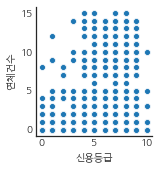

In [108]:
sns.pairplot(df_new_p , y_vars = ['연체건수'],x_vars = ['신용등급'])

In [389]:
df_new_p.head()

,고객ID,고객유형,생년,거주지,시,구군,남여구분,판매유형,계약유형,유통경로,...,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부,연령대,계정수
0,66758234,개인,1979,경기도,경기도,평택시,여자,렌탈,일반,서비스 방문,...,DES-1,96900,계약확정,0,없음,9,새마을금고,정상,40,1
1,66755948,개인,1982,경기도,경기도,평택시,남자,렌탈,교체렌탈,서비스 방문,...,DES-1,102900,계약확정,0,없음,2,현대카드,정상,30,2
2,66755948,개인,1982,경기도,경기도,평택시,남자,렌탈,프로모션,서비스 방문,...,DES-3A,90900,계약확정,0,없음,2,현대카드,정상,30,2
3,66756657,개인,1973,경기도,경기도,평택시,여자,렌탈,일반,홈쇼핑/방송,...,DES-1,96900,계약확정,0,없음,8,우리은행,정상,40,1
4,66423450,개인,1982,경기도,경기도,포천시,남자,멤버십,멤버십S,렌탈재계약,...,DES-1,66900,계약확정,0,없음,5,농협회원조합,정상,30,1


In [577]:
df_new_p['계약기간'].value_counts()

60    40244
36     2955
12     2347
39      723
Name: 계약기간, dtype: int64

In [583]:
print(60* 30)
print(36* 30)
print(12* 30)
print(39* 30)

1800
1080
360
1170


In [587]:
df_new_p.head()

df_new_p['계약기간'].unique()

array([60, 12, 36, 39])

In [596]:
df_new_p[df_new_p['계약기간'] == 12]['연령대'].mode()

0    30
dtype: int64

In [597]:
df_new_p[df_new_p['계약기간'] == 36]['연령대'].mode()

0    30
dtype: int64

In [598]:
df_new_p[df_new_p['계약기간'] == 39]['연령대'].mode()

0    40
dtype: int64

In [599]:
df_new_p[df_new_p['계약기간'] == 60]['연령대'].mode()

0    30
dtype: int64

In [602]:
df_new_p['연령대'].value_counts()

30    17412
40    14408
50     8011
60     2677
20     2665
70      905
80      184
90        6
10        1
Name: 연령대, dtype: int64

In [603]:
two = df_new_p[df_new_p['연령대'] == 20]
three = df_new_p[df_new_p['연령대'] == 30]
tt = 

,고객ID,고객유형,생년,거주지,시,구군,남여구분,판매유형,계약유형,유통경로,...,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부,연령대,계정수
13,66355286,개인,1986,경상도,경상도,포항시 북구,여자,렌탈,프로모션,방문판매,...,DES-3A,90900,계약확정,0,없음,7,현대카드,정상,20,1
18,66757035,개인,1989,경상도,부산광역시,해운대구,여자,렌탈,프로모션,하이마트,...,DES-1,96900,계약확정,0,없음,4,부산은행,정상,20,1
36,66758315,개인,1992,서울특별시,서울특별시,강남구,여자,렌탈,프로모션,방문판매,...,DES-1,105900,계약확정,0,없음,6,우리은행,정상,20,1
48,66670488,개인,1987,서울특별시,서울특별시,강서구,여자,렌탈,프로모션,방문판매,...,DES-1,96900,계약확정,0,없음,4,우리은행,정상,20,1
54,66758851,개인,1994,경기도,인천광역시,계양구,남자,렌탈,일반,방문판매,...,DES-R4,126900,계약확정,12,있음,5,농협중앙회,정상,20,1
81,66369912,개인,1986,서울특별시,서울특별시,관악구,여자,렌탈,프로모션,방문판매,...,DES-1,111900,계약확정,0,없음,4,우리은행,정상,20,1
89,66423756,개인,1989,전라도,광주광역시,광산구,남자,멤버십,멤버십S,렌탈재계약,...,DES-1,75900,계약확정,0,없음,2,하나은행,정상,20,1
155,66758308,개인,1990,경기도,경기도,김포시,여자,렌탈,통합 패키지,홈쇼핑,...,DES-1,81900,계약확정,0,없음,5,우리은행,정상,20,2
156,66758308,개인,1990,경기도,경기도,김포시,여자,렌탈,통합 패키지,홈쇼핑,...,DES-2,81900,계약확정,0,없음,5,우리은행,정상,20,2
181,66758701,개인,1986,경기도,인천광역시,남구,남자,렌탈,프로모션,하이마트,...,DES-1,111900,계약확정,0,없음,6,우리은행,정상,20,1


# 3.Modeling

In [516]:
df_new_p['해약여부'] = np.where(df_new_p['해약여부'] == '정상', 0,1)
df_new_p['연체여부'] = np.where(df_new_p['연체여부'] == '없음', 0,1)
df_new_p.head()

,고객ID,고객유형,생년,거주지,시,구군,남여구분,판매유형,계약유형,유통경로,...,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부,연령대,계정수
0,66758234,개인,1979,경기도,경기도,평택시,여자,렌탈,일반,방문판매,...,DES-1,96900,계약확정,0,0,9,새마을금고,0,30,1
1,66755948,개인,1982,경기도,경기도,평택시,남자,렌탈,교체렌탈,방문판매,...,DES-1,102900,계약확정,0,0,2,현대카드,0,30,2
2,66755948,개인,1982,경기도,경기도,평택시,남자,렌탈,프로모션,방문판매,...,DES-3A,90900,계약확정,0,0,2,현대카드,0,30,2
3,66756657,개인,1973,경기도,경기도,평택시,여자,렌탈,일반,홈쇼핑,...,DES-1,96900,계약확정,0,0,8,우리은행,0,40,1
4,66423450,개인,1982,경기도,경기도,포천시,남자,멤버십,멤버십S,렌탈재계약,...,DES-1,66900,계약확정,0,0,5,농협회원조합,0,30,1


In [517]:
df_new_p.columns

Index(['고객ID', '고객유형', '생년', '거주지', '시', '구군', '남여구분', '판매유형', '계약유형', '유통경로',
       '계약일', '계약기간', '납부유형', '제품군', '월랜탈비용', '계약상태', '연체건수', '연체여부', '신용등급',
       '결제은행', '해약여부', '연령대', '계정수'],
      dtype='object')

In [548]:
df_new = df_new_p.drop(['고객ID','고객유형', '생년','계약일','연체건수','계약상태',
                       '구군','결제은행','시','계정수','연체여부','제품군','월랜탈비용','계약기간'
                        ,'유통경로','신용등급']
                       ,axis = 1,inplace = False)  #  설명변수
df_new.head()
# df_new.columns

,거주지,남여구분,판매유형,계약유형,납부유형,해약여부,연령대
0,경기도,여자,렌탈,일반,CMS,0,30
1,경기도,남자,렌탈,교체렌탈,카드이체,0,30
2,경기도,남자,렌탈,프로모션,카드이체,0,30
3,경기도,여자,렌탈,일반,CMS,0,40
4,경기도,남자,멤버십,멤버십S,CMS,0,30


In [549]:
df_new_dummy = pd.get_dummies(df_new)
df_new_dummy.head()

,해약여부,연령대,거주지_강원도,거주지_경기도,거주지_경상도,거주지_서울특별시,거주지_전라도,거주지_제주도,거주지_충청도,남여구분_남자,...,계약유형_멤버십B,계약유형_멤버십S,계약유형_멥버십C,계약유형_일반,계약유형_통합 패키지,계약유형_프로모션,납부유형_CMS,납부유형_가상계좌,납부유형_무통장,납부유형_카드이체
0,0,30,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,30,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,30,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
3,0,40,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,30,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0


In [550]:
df_new_y = df_new_dummy['해약여부']  #  목표변수
df_new_x = df_new_dummy.drop('해약여부',axis = 1,inplace = False)  #  설명변수

# train, test set(7:3)

In [521]:
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_new_x, df_new_y, test_size = 0.3, random_state= 1234)

print('train data X size:{}'.format(df_train_x.shape))
print('train data Y size:{}'.format(df_train_y.shape))
print('test data X size:{}'.format(df_test_x.shape))
print('test data Y size:{}'.format(df_test_y.shape))

train data X size:(32388, 33)
train data Y size:(32388,)
test data X size:(13881, 33)
test data Y size:(13881,)


# 평가지표

In [329]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test,pred)
    
    print('오차 행렬\n')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 score : {3:.4f}, AUC : {4:.4f}'
          .format(accuracy, precision, recall,f1,roc_auc))

# 1.Decision Tree

# Base model

In [374]:
tree_uncustomized = DecisionTreeClassifier(random_state= 1234)
tree_uncustomized.fit(df_train_x,df_train_y)
y_pred = tree_uncustomized.predict(df_test_x)
get_clf_eval(df_test_y,y_pred)

오차 행렬

[[13500   120]
 [  125   136]]
정확도 : 0.9823, 정밀도 : 0.5312, 재현율 : 0.5211, F1 score : 0.5261, AUC : 0.7561


In [375]:
print(classification_report(df_test_y,y_pred))  

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13620
           1       0.53      0.52      0.53       261

    accuracy                           0.98     13881
   macro avg       0.76      0.76      0.76     13881
weighted avg       0.98      0.98      0.98     13881



df_new = df_new_p.drop(['고객ID','고객유형','생년','시','구군','계약일','계약상태'],axis = 1,inplace = False)  #  설명변수

0.47,0.49,0.48


# parameter 조정

   Depth  TrainAccuracy  TestAccuracy
0      1          0.980         0.981
1      2          0.981         0.981
2      3          0.989         0.989
3      4          0.989         0.990
4      5          0.989         0.990
5      6          0.989         0.990
6      7          0.989         0.990
7      8          0.989         0.990
8      9          0.989         0.989
9     10          0.989         0.989


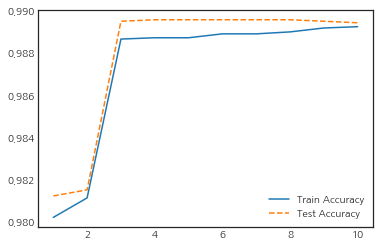

In [154]:
train_accuracy = []
test_accuracy = []

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth,random_state = 1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy

print(df_accuracy_depth.round(3))

plt.plot(para_depth,train_accuracy,linestyle='-',label = 'Train Accuracy')
plt.plot(para_depth,test_accuracy,linestyle='--',label = 'Test Accuracy')
plt.legend()

   MinSamplesSplit  TrainAccuracy  TestAccuracy
0               10          0.989          0.99
1               20          0.989          0.99
2               30          0.989          0.99
3               40          0.989          0.99
4               50          0.989          0.99
5               60          0.989          0.99
6               70          0.989          0.99
7               80          0.989          0.99
8               90          0.989          0.99
9              100          0.989          0.99


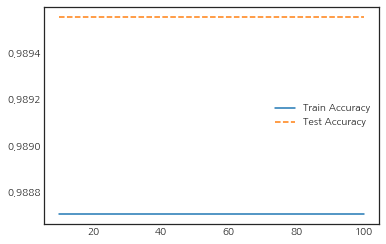

In [155]:
train_accuracy = []
test_accuracy = []

para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split, max_depth = 4,random_state = 1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSamplesSplit'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy

print(df_accuracy_split.round(3))

plt.plot(para_split,train_accuracy,linestyle='-',label = 'Train Accuracy')
plt.plot(para_split,test_accuracy,linestyle='--',label = 'Test Accuracy')
plt.legend()

   MinSamplesSplit  TrainAccuracy  TestAccuracy
0                2          0.989         0.990
1                4          0.989         0.989
2                6          0.989         0.989
3                8          0.988         0.989
4               10          0.988         0.989
5               12          0.988         0.989
6               14          0.988         0.989
7               16          0.988         0.989
8               18          0.988         0.989
9               20          0.988         0.989


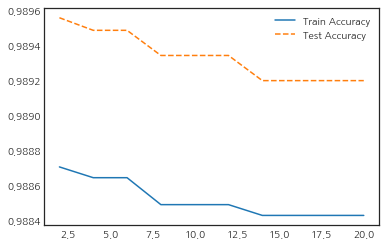

In [156]:
train_accuracy = []
test_accuracy = []

para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf= v_min_samples_leaf ,min_samples_split = 20, max_depth = 4,random_state = 1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesSplit'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy

print(df_accuracy_leaf.round(3))

plt.plot(para_leaf,train_accuracy,linestyle='-',label = 'Train Accuracy')
plt.plot(para_leaf,test_accuracy,linestyle='--',label = 'Test Accuracy')
plt.legend()

In [28]:
tree_final = DecisionTreeClassifier(min_samples_leaf = 5, min_samples_split = 20, max_depth = 4,random_state= 1234)
tree_final.fit(df_train_x,df_train_y)
y_pred = tree_final.predict(df_test_x)
get_clf_eval(df_test_y,y_pred)

오차 행렬

[[13589    31]
 [  118   143]]
정확도 : 0.9893, 정밀도 : 0.8218, 재현율 : 0.5479, F1 score : 0.6575, AUC : 0.7728


In [30]:
print(classification_report(df_test_y,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13620
           1       0.82      0.55      0.66       261

    accuracy                           0.99     13881
   macro avg       0.91      0.77      0.83     13881
weighted avg       0.99      0.99      0.99     13881



# Neighbourhood Cleaning Rule

In [73]:
XX_samp, yy_samp = RandomUnderSampler(random_state= 1234).fit_sample(df_train_x,df_train_y)

In [51]:
XX_samp, yy_samp = NeighbourhoodCleaningRule(kind_sel="all", n_neighbors=5, random_state=0).fit_sample(df_train_x, df_train_y)

In [74]:
print("NCR 전 학습 데이터 셋 : ", df_train_x.shape, df_train_y.shape)
print("NCR 후 학습 데이터 셋 : ", XX_samp.shape, yy_samp.shape)

NCR 전 학습 데이터 셋 :  (32388, 43) (32388,)
NCR 후 학습 데이터 셋 :  (1284, 43) (1284,)


In [53]:
tree_final = DecisionTreeClassifier(min_samples_leaf = 5, min_samples_split = 20, max_depth = 4,random_state= 1234)
tree_final.fit(XX_samp,yy_samp)
y_pred = tree_final.predict(df_test_x)
get_clf_eval(df_test_y,y_pred)

오차 행렬

[[13619     1]
 [  145   116]]
정확도 : 0.9895, 정밀도 : 0.9915, 재현율 : 0.4444, F1 score : 0.6138, AUC : 0.7222


In [54]:
print(classification_report(df_test_y,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13620
           1       0.99      0.44      0.61       261

    accuracy                           0.99     13881
   macro avg       0.99      0.72      0.80     13881
weighted avg       0.99      0.99      0.99     13881



# SMOTE 데이터 불균형처리 및 임계값 조정

In [429]:
sm = SMOTE(ratio='auto',kind= 'regular',random_state=1234)
X_samp, y_samp = sm.fit_sample(df_train_x, df_train_y)

In [430]:
print("SMOTE 전 학습 데이터 셋 : ", df_train_x.shape, df_train_y.shape)
print("SMOTE 후 학습 데이터 셋 : ", X_samp.shape, y_samp.shape)

SMOTE 전 학습 데이터 셋 :  (32388, 33) (32388,)
SMOTE 후 학습 데이터 셋 :  (63492, 33) (63492,)


In [431]:
print('After OverSampling, the shape of train_X: {}'.format(X_samp.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_samp.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_samp==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_samp==0)))

After OverSampling, the shape of train_X: (63492, 33)
After OverSampling, the shape of train_y: (63492,) 

After OverSampling, counts of label '1': 31746
After OverSampling, counts of label '0': 31746


In [333]:
tree_final = DecisionTreeClassifier(min_samples_leaf = 5, min_samples_split = 20, max_depth = 4,random_state= 1234)
tree_final.fit(df_train_x,df_train_y)
y_pred = tree_final.predict(df_test_x)
get_clf_eval(df_test_y,y_pred)

오차 행렬

[[13589    31]
 [  118   143]]
정확도 : 0.9893, 정밀도 : 0.8218, 재현율 : 0.5479, F1 score : 0.6575, AUC : 0.7728


In [334]:
print(classification_report(df_test_y,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13620
           1       0.82      0.55      0.66       261

    accuracy                           0.99     13881
   macro avg       0.91      0.77      0.83     13881
weighted avg       0.99      0.99      0.99     13881



In [45]:
pred_proba_1

array([[0.00328463],
       [0.00328463],
       [0.00747965],
       ...,
       [0.00328463],
       [0.00747965],
       [0.0208432 ]])

In [56]:
df_test_x['our_prob'] = pred_proba_1 * 10

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
df_test_x['our_prob'] = round(df_test_x['our_prob'],2)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
df_test_x['our_prob'].value_counts()

0.07    5827
0.03    3710
0.15    2651
0.21     888
0.16     436
0.00     104
9.90      89
6.27      81
0.46      55
0.82      32
0.90       8
Name: our_prob, dtype: int64

In [54]:
con1 = df_test_x['our_prob'] ==10
con2 = df_test_x['our_prob'] ==2.22

df_test_x.loc[(con1|con2),'our_prob' ] = 0.9

/home/pirl/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [50]:
pred_proba = tree_final.predict_proba(df_test_x)  
y_pred = tree_final.predict(df_test_x)
print("predict_proba 결과 shape : ", pred_proba.shape)
print("pred 결과 앞 3개 : \n", pred_proba[:3])
print("*"*100)
pred_proba_result = np.concatenate([pred_proba, y_pred.reshape(-1, 1)], axis = 1)
print("두 개중 큰 값으로 예측 : \n", pred_proba_result[:10])

ValueError: Number of features of the model must match the input. Model n_features is 333 and input n_features is 334 

In [34]:
# 두 번째 컬럼 즉. Positive 클래스 하나만 사용
pred_proba = tree_final.predict_proba(df_test_x)  
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold = 0.8).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
get_clf_eval(df_test_y, custom_predict)

오차 행렬

[[13619     1]
 [  169    92]]
정확도 : 0.9878, 정밀도 : 0.9892, 재현율 : 0.3525, F1 score : 0.5198, AUC : 0.6762


In [32]:
print(classification_report(df_test_y,custom_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13620
           1       0.99      0.35      0.52       261

    accuracy                           0.99     13881
   macro avg       0.99      0.68      0.76     13881
weighted avg       0.99      0.99      0.98     13881



In [247]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    #X축을 threshold 값으로, y축을 각각 정밀도, 재현율로
    
    plt.figure(figsize = (12, 6))
    threshold_boundary = thresholds.shape[0] #147
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold vlaue')
    plt.ylabel('Precision and Recall')
    plt.show()

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


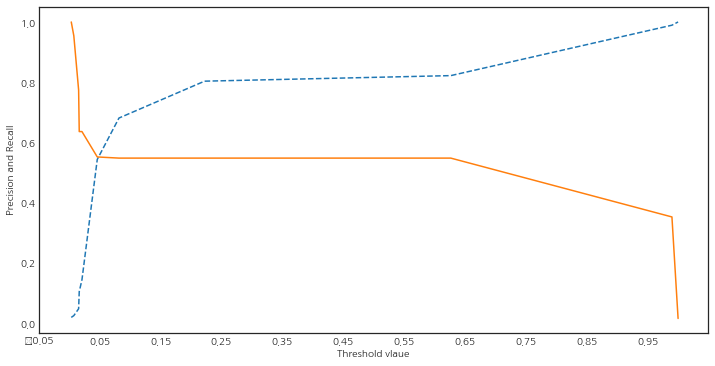

In [330]:
precision_recall_curve_plot(df_test_y, tree_final.predict_proba(df_test_x)[:, 1])

# 2.Random Forest

    n_estimators  TrainScore  TestScore
0             10       0.989      0.989
1             20       0.989      0.989
2             30       0.989      0.989
3             40       0.989      0.989
4             50       0.989      0.989
5             60       0.989      0.989
6             70       0.989      0.989
7             80       0.989      0.989
8             90       0.989      0.989
9            100       0.989      0.989
10           110       0.989      0.989
11           120       0.989      0.989
12           130       0.989      0.989
13           140       0.989      0.989
14           150       0.989      0.989


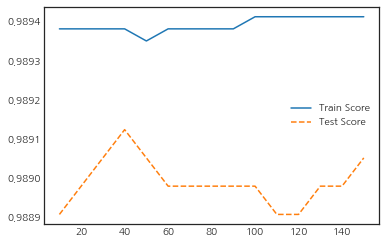

In [178]:
train_score = []
test_score = []

para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimator in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimator,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

print(df_score_n.round(3))

plt.plot(para_n_tree,train_score,linestyle='-',label = 'Train Score')
plt.plot(para_n_tree,test_score,linestyle='--',label = 'Test Score')
plt.legend()

    MinSamplesLeaf  TrainScore  TestScore
0                1       0.989      0.989
1                2       0.989      0.989
2                3       0.989      0.989
3                4       0.989      0.989
4                5       0.989      0.989
5                6       0.988      0.989
6                7       0.988      0.989
7                8       0.988      0.989
8                9       0.988      0.989
9               10       0.988      0.989
10              11       0.988      0.989
11              12       0.988      0.989
12              13       0.988      0.989
13              14       0.988      0.989
14              15       0.988      0.989
15              16       0.988      0.989
16              17       0.988      0.989
17              18       0.988      0.989
18              19       0.988      0.989
19              20       0.988      0.989


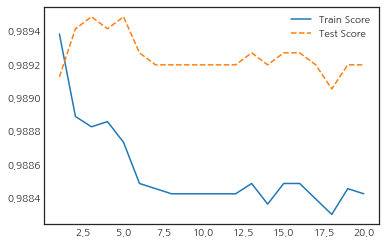

In [179]:
train_score = []
test_score = []

para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples in para_leaf:
    rf = RandomForestClassifier(n_estimators = 40,min_samples_leaf = v_min_samples ,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

print(df_score_leaf.round(3))

plt.plot(para_leaf,train_score,linestyle='-',label = 'Train Score')
plt.plot(para_leaf,test_score,linestyle='--',label = 'Test Score')
plt.legend()

    MinSamplesLeaf  TrainScore  TestScore
0                4       0.989      0.989
1                6       0.989      0.989
2                8       0.989      0.989
3               10       0.989      0.989
4               12       0.989      0.990
5               14       0.989      0.990
6               16       0.989      0.989
7               18       0.989      0.989
8               20       0.988      0.989
9               22       0.988      0.989
10              24       0.989      0.989
11              26       0.989      0.989
12              28       0.989      0.989
13              30       0.988      0.989
14              32       0.989      0.989
15              34       0.988      0.989
16              36       0.989      0.989
17              38       0.988      0.989
18              40       0.988      0.989


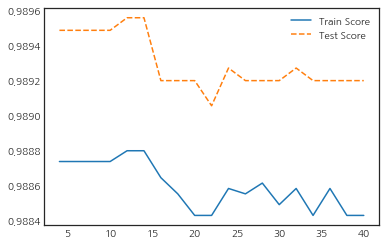

In [180]:
train_score = []
test_score = []

para_split = [n_split * 2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(n_estimators = 40,min_samples_leaf = 5, min_samples_split=v_min_samples_split ,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesLeaf'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

print(df_score_split.round(3))

plt.plot(para_split,train_score,linestyle='-',label = 'Train Score')
plt.plot(para_split,test_score,linestyle='--',label = 'Test Score')
plt.legend()

   MinSamplesLeaf  TrainScore  TestScore
0               1       0.980      0.981
1               2       0.980      0.981
2               3       0.980      0.981
3               4       0.981      0.982
4               5       0.988      0.989
5               6       0.988      0.989
6               7       0.988      0.989
7               8       0.989      0.990
8               9       0.988      0.989
9              10       0.989      0.989


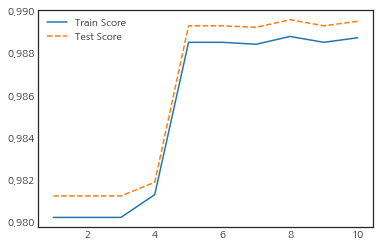

In [181]:
train_score = []
test_score = []

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(n_estimators = 40,min_samples_leaf = 5, min_samples_split=14,max_depth=v_max_depth ,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['MinSamplesLeaf'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

print(df_score_depth.round(3))

plt.plot(para_depth,train_score,linestyle='-',label = 'Train Score')
plt.plot(para_depth,test_score,linestyle='--',label = 'Test Score')
plt.legend()

In [484]:
rf_final = RandomForestClassifier(n_estimators=40 , min_samples_leaf = 5, min_samples_split = 14, max_depth = 5
                                  ,random_state= 1234,)
rf_final.fit(X_samp,y_samp)
y_pred = rf_final.predict(df_test_x)
get_clf_eval(df_test_y,y_pred)

오차 행렬

[[12943   677]
 [  104   157]]
정확도 : 0.9437, 정밀도 : 0.1882, 재현율 : 0.6015, F1 score : 0.2868, AUC : 0.7759


In [485]:
print(classification_report(df_test_y,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     13620
           1       0.19      0.60      0.29       261

    accuracy                           0.94     13881
   macro avg       0.59      0.78      0.63     13881
weighted avg       0.98      0.94      0.96     13881



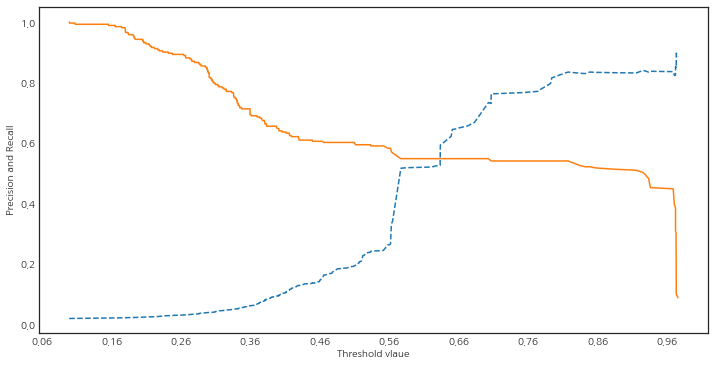

In [486]:
precision_recall_curve_plot(df_test_y, rf_final.predict_proba(df_test_x)[:, 1])

In [490]:
pred_proba = rf_final.predict_proba(df_test_x)  
pred_proba1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold = 0.80).fit(pred_proba1)
custom_predict = binarizer.transform(pred_proba1)

get_clf_eval(df_test_y,custom_predict)

오차 행렬

[[13590    30]
 [  120   141]]
정확도 : 0.9892, 정밀도 : 0.8246, 재현율 : 0.5402, F1 score : 0.6528, AUC : 0.7690


In [491]:
print(classification_report(df_test_y,custom_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13620
           1       0.82      0.54      0.65       261

    accuracy                           0.99     13881
   macro avg       0.91      0.77      0.82     13881
weighted avg       0.99      0.99      0.99     13881



# 3.GBM

In [227]:
# train_accuracy = []
# test_accuracy = []

# para_lr = [lr * 0.1 for lr in range(1,10)]

# for v_learning_rate in para_lr:
#     gb = GradientBoostingClassifier(learning_rate = v_learning_rate ,random_state=1234)
#     gb.fit(X_samp,y_samp)
#     train_accuracy.append(gb.score(df_train_x,df_train_y))
#     test_accuracy.append(gb.score(df_test_x,df_test_y))
    
# df_accuracy_lr = pd.DataFrame()
# df_accuracy_lr['LearningRate'] = para_lr
# df_accuracy_lr['Trainaccuracy'] = train_accuracy
# df_accuracy_lr['Testaccuracy'] = test_accuracy

# print(df_accuracy_lr.round(3))

# plt.plot(para_lr,train_accuracy,linestyle='-',label = 'Train accuracy')
# plt.plot(para_lr,test_accuracy,linestyle='--',label = 'Test accuracy')
# plt.legend()

In [ ]:
# train_accuracy = []
# test_accuracy = []

# para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

# for v_n_estimators in para_n_tree:
#     gb = GradientBoostingClassifier(n_estimators= v_n_estimators, learning_rate =0.1 ,random_state=1234)
#     gb.fit(X_samp,y_samp)
#     train_accuracy.append(gb.score(X_samp,y_samp))
#     test_accuracy.append(gb.score(df_test_x,df_test_y))
    
# df_accuracy_n = pd.DataFrame()
# df_accuracy_n['Estimators'] = para_n_tree
# df_accuracy_n['Trainaccuracy'] = train_accuracy
# df_accuracy_n['Testaccuracy'] = test_accuracy

# print(df_accuracy_n.round(3))

# plt.plot(para_n_tree,train_accuracy,linestyle='-',label = 'Train accuracy')
# plt.plot(para_n_tree,test_accuracy,linestyle='--',label = 'Test accuracy')
# plt.legend()

In [ ]:
# train_accuracy = []
# test_accuracy = []

# para_depth = [depth for depth in range(1,11)]

# for v_max_depth in para_depth:
#     gb = GradientBoostingClassifier(max_depth=v_max_depth ,n_estimators =100, learning_rate = 0.1 ,random_state=1234)
#     gb.fit(X_samp,y_samp)
#     train_accuracy.append(gb.score(X_samp,y_samp))
#     test_accuracy.append(gb.score(df_test_x,df_test_y))
    
# df_accuracy_depth = pd.DataFrame()
# df_accuracy_depth['MaxDepth'] = para_depth
# df_accuracy_depth['Trainaccuracy'] = train_accuracy
# df_accuracy_depth['Testaccuracy'] = test_accuracy

# print(df_accuracy_depth.round(3))

# plt.plot(para_depth,train_accuracy,linestyle='-',label = 'Train accuracy')
# plt.plot(para_depth,test_accuracy,linestyle='--',label = 'Test accuracy')
# plt.legend()

In [ ]:
# train_accuracy = []
# test_accuracy = []

# para_split = [n_split *10 for n_split in range(2,11)]

# for v_min_samples_split in para_split:
#     gb = GradientBoostingClassifier(min_samples_split=v_min_samples_split,max_depth=4 ,n_estimators =100, learning_rate = 0.1 ,random_state=1234)
#     gb.fit(X_samp,y_samp)
#     train_accuracy.append(gb.score(X_samp,y_samp))
#     test_accuracy.append(gb.score(df_test_x,df_test_y))
    
# df_accuracy_split = pd.DataFrame()
# df_accuracy_split['MinSamplesSplit'] = para_split
# df_accuracy_split['Trainaccuracy'] = train_accuracy
# df_accuracy_split['Testaccuracy'] = test_accuracy

# print(df_accuracy_split.round(3))

# plt.plot(para_split,train_accuracy,linestyle='-',label = 'Train accuracy')
# plt.plot(para_split,test_accuracy,linestyle='--',label = 'Test accuracy')
# plt.legend()

In [ ]:
# train_accuracy = []
# test_accuracy = []

# para_leaf = [n_leaf *10 for n_leaf in range(1,11)]

# for v_min_samples_leaf in para_leaf:
#     gb = GradientBoostingClassifier(min_samples_leaf=v_min_samples_leaf,min_samples_split=22,max_depth=4 
#                                     ,n_estimators =100, learning_rate = 0.1 ,random_state=1234)
#     gb.fit(X_samp,y_samp)
#     train_accuracy.append(gb.score(X_samp,y_samp))
#     test_accuracy.append(gb.score(df_test_x,df_test_y))
    
# df_accuracy_leaf = pd.DataFrame()
# df_accuracy_leaf['MinSamplesleaf'] = para_leaf
# df_accuracy_leaf['Trainaccuracy'] = train_accuracy
# df_accuracy_leaf['Testaccuracy'] = test_accuracy

# print(df_accuracy_leaf.round(3))

# plt.plot(para_leaf,train_accuracy,linestyle='-',label = 'Train accuracy')
# plt.plot(para_leaf,test_accuracy,linestyle='--',label = 'Test accuracy')
# plt.legend()

In [492]:
gbm_final = GradientBoostingClassifier(n_estimators=100 , min_samples_leaf = 10, min_samples_split = 20
                                       , max_depth = 5,learning_rate = 0.15,random_state= 1234)
gbm_final.fit(X_samp,y_samp)
y_pred = gbm_final.predict(df_test_x)
get_clf_eval(df_test_y,y_pred)

오차 행렬

[[13323   297]
 [  109   152]]
정확도 : 0.9708, 정밀도 : 0.3385, 재현율 : 0.5824, F1 score : 0.4282, AUC : 0.7803


In [493]:
print(classification_report(df_test_y,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     13620
           1       0.34      0.58      0.43       261

    accuracy                           0.97     13881
   macro avg       0.67      0.78      0.71     13881
weighted avg       0.98      0.97      0.97     13881



/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


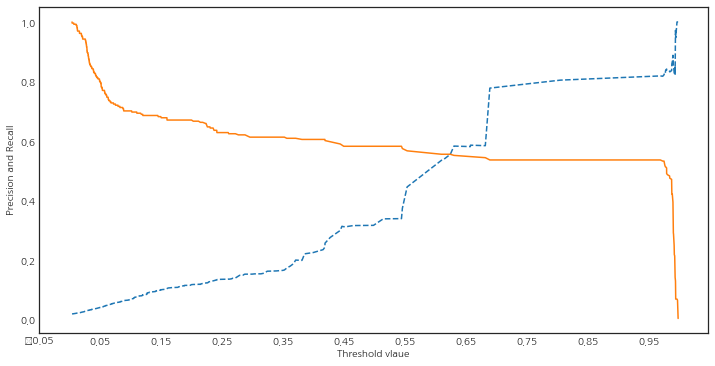

In [494]:
precision_recall_curve_plot(df_test_y, gbm_final.predict_proba(df_test_x)[:, 1])

In [497]:
pred_proba = gbm_final.predict_proba(df_test_x)  
pred_proba1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold = 0.80).fit(pred_proba1)
custom_predict = binarizer.transform(pred_proba1)

get_clf_eval(df_test_y,custom_predict)

오차 행렬

[[13586    34]
 [  121   140]]
정확도 : 0.9888, 정밀도 : 0.8046, 재현율 : 0.5364, F1 score : 0.6437, AUC : 0.7670


In [442]:
print(classification_report(df_test_y,custom_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13620
           1       0.82      0.54      0.65       261

    accuracy                           0.99     13881
   macro avg       0.91      0.77      0.82     13881
weighted avg       0.99      0.99      0.99     13881



In [443]:
v_feature_name = df_train_x.columns

df_importance =pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']= gbm_final.feature_importances_

df_importance.sort_values('Importance',ascending = False , inplace = True)
df_importance.round(3)

,Feature,Importance
0,계약기간,0.386
29,납부유형_CMS,0.075
10,남여구분_남자,0.065
11,남여구분_여자,0.064
32,납부유형_카드이체,0.046
1,월랜탈비용,0.041
5,거주지_경상도,0.040
4,거주지_경기도,0.030
2,연령대,0.029
28,유통경로_홈쇼핑,0.024


# 4.XG boost

In [498]:
name = df_test_x.columns

In [499]:
df_x = pd.DataFrame(X_samp.reshape(len(X_samp), len(name)), columns = name) 

In [500]:
xgb = XGBClassifier(n_estimators=400, learning_rate = 0.15, max_depth = 5)
xgb.fit(df_x,y_samp)
xgb_pred = xgb.predict(df_test_x)

In [501]:
print(classification_report(df_test_y,xgb_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     13620
           1       0.31      0.57      0.41       261

    accuracy                           0.97     13881
   macro avg       0.65      0.78      0.69     13881
weighted avg       0.98      0.97      0.97     13881



/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


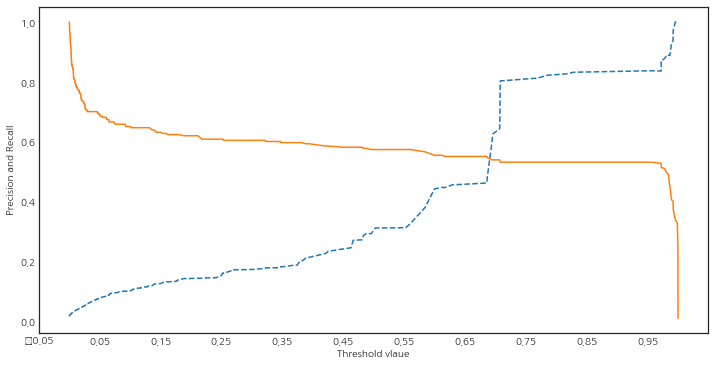

In [502]:
precision_recall_curve_plot(df_test_y, xgb.predict_proba(df_test_x)[:, 1])

In [503]:
pred_proba = xgb.predict_proba(df_test_x)  
pred_proba1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold = 0.93).fit(pred_proba1)
custom_predict = binarizer.transform(pred_proba1)

get_clf_eval(df_test_y,custom_predict)

오차 행렬

[[13593    27]
 [  122   139]]
정확도 : 0.9893, 정밀도 : 0.8373, 재현율 : 0.5326, F1 score : 0.6511, AUC : 0.7653


In [451]:
print(classification_report(df_test_y,custom_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13620
           1       0.84      0.53      0.65       261

    accuracy                           0.99     13881
   macro avg       0.91      0.77      0.82     13881
weighted avg       0.99      0.99      0.99     13881



In [464]:
v_feature_name = df_train_x.columns

df_importance =pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']= xgb.feature_importances_

df_importance.sort_values('Importance',ascending = False , inplace = True)
df_importance.round(3)

,Feature,Importance
0,계약기간,0.273
31,납부유형_무통장,0.173
15,계약유형_멤버십S,0.053
32,납부유형_카드이체,0.051
12,계약유형_교체렌탈,0.034
7,거주지_전라도,0.031
5,거주지_경상도,0.028
29,납부유형_CMS,0.027
9,거주지_충청도,0.027
11,남여구분_여자,0.026


# 5.Light GBM

In [465]:
# df_train_xx = df_train_x.as_matrix()

In [504]:
lgb = LGBMClassifier(n_estimaotrs = 400,max_dppth = 5,learning_rate=0.10)
lgb.fit(X_samp, y_samp)
lgb_pred = lgb.predict(df_test_x)

In [505]:
print(classification_report(df_test_y,lgb_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     13620
           1       0.32      0.59      0.41       261

    accuracy                           0.97     13881
   macro avg       0.66      0.78      0.70     13881
weighted avg       0.98      0.97      0.97     13881



/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


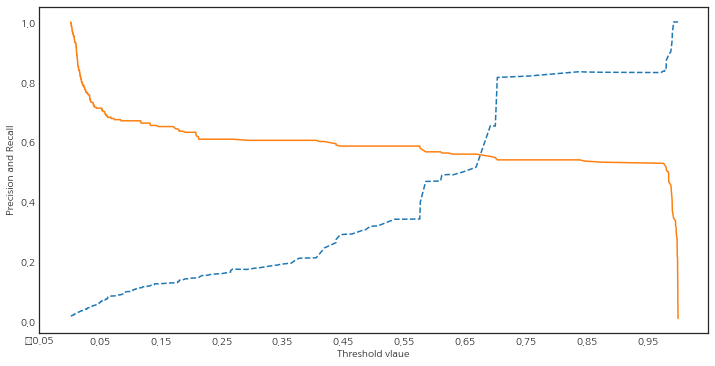

In [506]:
precision_recall_curve_plot(df_test_y, lgb.predict_proba(df_test_x)[:, 1])

In [507]:
pred_proba = lgb.predict_proba(df_test_x)  
pred_proba1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold = 0.83).fit(pred_proba1)
custom_predict = binarizer.transform(pred_proba1)

get_clf_eval(df_test_y,custom_predict)

오차 행렬

[[13592    28]
 [  120   141]]
정확도 : 0.9893, 정밀도 : 0.8343, 재현율 : 0.5402, F1 score : 0.6558, AUC : 0.7691


In [475]:
print(classification_report(df_test_y,custom_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13620
           1       0.83      0.54      0.66       261

    accuracy                           0.99     13881
   macro avg       0.91      0.77      0.83     13881
weighted avg       0.99      0.99      0.99     13881



# 6.CAT boost

In [413]:
from catboost import CatBoostClassifier

In [551]:
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_new_x, df_new_y, test_size = 0.3, random_state= 1234)
df_train_x,df_valid_x,df_train_y,df_valid_y = train_test_split(df_train_x, df_train_y, test_size = 0.4, random_state= 1234)

In [552]:
df_train_x_df = pd.DataFrame(data = df_train_x, columns = df_new_x.columns)

cat_features = np.where(df_train_x_df.dtypes.astype('str').isin(['category','object']))[0]
caB_b = CatBoostClassifier(random_seed=1234)

caB_b.fit(X= df_train_x,y = df_train_y,cat_features= cat_features,eval_set=(df_valid_x,df_valid_y))
caB_pred = caB_b.predict(df_test_x)

print(classification_report(df_test_y,caB_pred))

Learning rate set to 0.106548
0:	learn: 0.4810380	test: 0.4812312	best: 0.4812312 (0)	total: 29.8ms	remaining: 29.8s
1:	learn: 0.3389158	test: 0.3393331	best: 0.3393331 (1)	total: 55ms	remaining: 27.4s
2:	learn: 0.2505821	test: 0.2508581	best: 0.2508581 (2)	total: 77.5ms	remaining: 25.8s
3:	learn: 0.1962733	test: 0.1964600	best: 0.1964600 (3)	total: 87ms	remaining: 21.7s
4:	learn: 0.1573164	test: 0.1573258	best: 0.1573258 (4)	total: 94.3ms	remaining: 18.8s
5:	learn: 0.1271288	test: 0.1275497	best: 0.1275497 (5)	total: 101ms	remaining: 16.8s
6:	learn: 0.1136663	test: 0.1138039	best: 0.1138039 (6)	total: 106ms	remaining: 15s
7:	learn: 0.0969369	test: 0.0976478	best: 0.0976478 (7)	total: 113ms	remaining: 14.1s
8:	learn: 0.0858638	test: 0.0868641	best: 0.0868641 (8)	total: 120ms	remaining: 13.2s
9:	learn: 0.0777633	test: 0.0790240	best: 0.0790240 (9)	total: 127ms	remaining: 12.6s
10:	learn: 0.0718146	test: 0.0733877	best: 0.0733877 (10)	total: 134ms	remaining: 12.1s
11:	learn: 0.0680775	te

100:	learn: 0.0505129	test: 0.0568223	best: 0.0565381 (66)	total: 1.66s	remaining: 14.8s
101:	learn: 0.0505124	test: 0.0568228	best: 0.0565381 (66)	total: 1.68s	remaining: 14.8s
102:	learn: 0.0504625	test: 0.0568057	best: 0.0565381 (66)	total: 1.7s	remaining: 14.8s
103:	learn: 0.0504417	test: 0.0567934	best: 0.0565381 (66)	total: 1.72s	remaining: 14.8s
104:	learn: 0.0504191	test: 0.0568337	best: 0.0565381 (66)	total: 1.74s	remaining: 14.8s
105:	learn: 0.0503831	test: 0.0568345	best: 0.0565381 (66)	total: 1.76s	remaining: 14.9s
106:	learn: 0.0503522	test: 0.0568233	best: 0.0565381 (66)	total: 1.78s	remaining: 14.9s
107:	learn: 0.0502952	test: 0.0568958	best: 0.0565381 (66)	total: 1.79s	remaining: 14.8s
108:	learn: 0.0502718	test: 0.0569218	best: 0.0565381 (66)	total: 1.81s	remaining: 14.8s
109:	learn: 0.0502193	test: 0.0569814	best: 0.0565381 (66)	total: 1.83s	remaining: 14.8s
110:	learn: 0.0501884	test: 0.0569798	best: 0.0565381 (66)	total: 1.84s	remaining: 14.7s
111:	learn: 0.0501488	

193:	learn: 0.0491596	test: 0.0578045	best: 0.0565381 (66)	total: 3.1s	remaining: 12.9s
194:	learn: 0.0491562	test: 0.0578096	best: 0.0565381 (66)	total: 3.12s	remaining: 12.9s
195:	learn: 0.0491494	test: 0.0578142	best: 0.0565381 (66)	total: 3.14s	remaining: 12.9s
196:	learn: 0.0491476	test: 0.0578258	best: 0.0565381 (66)	total: 3.17s	remaining: 12.9s
197:	learn: 0.0491448	test: 0.0578277	best: 0.0565381 (66)	total: 3.19s	remaining: 12.9s
198:	learn: 0.0491426	test: 0.0578351	best: 0.0565381 (66)	total: 3.21s	remaining: 12.9s
199:	learn: 0.0491350	test: 0.0578514	best: 0.0565381 (66)	total: 3.23s	remaining: 12.9s
200:	learn: 0.0491336	test: 0.0578565	best: 0.0565381 (66)	total: 3.25s	remaining: 12.9s
201:	learn: 0.0491318	test: 0.0578494	best: 0.0565381 (66)	total: 3.27s	remaining: 12.9s
202:	learn: 0.0491302	test: 0.0578556	best: 0.0565381 (66)	total: 3.29s	remaining: 12.9s
203:	learn: 0.0491294	test: 0.0578560	best: 0.0565381 (66)	total: 3.31s	remaining: 12.9s
204:	learn: 0.0491258	

295:	learn: 0.0488497	test: 0.0582854	best: 0.0565381 (66)	total: 4.76s	remaining: 11.3s
296:	learn: 0.0488463	test: 0.0582830	best: 0.0565381 (66)	total: 4.79s	remaining: 11.3s
297:	learn: 0.0488443	test: 0.0582935	best: 0.0565381 (66)	total: 4.8s	remaining: 11.3s
298:	learn: 0.0488432	test: 0.0582937	best: 0.0565381 (66)	total: 4.83s	remaining: 11.3s
299:	learn: 0.0488415	test: 0.0583038	best: 0.0565381 (66)	total: 4.85s	remaining: 11.3s
300:	learn: 0.0488405	test: 0.0583040	best: 0.0565381 (66)	total: 4.86s	remaining: 11.3s
301:	learn: 0.0488377	test: 0.0583021	best: 0.0565381 (66)	total: 4.88s	remaining: 11.3s
302:	learn: 0.0488351	test: 0.0583047	best: 0.0565381 (66)	total: 4.9s	remaining: 11.3s
303:	learn: 0.0488229	test: 0.0583054	best: 0.0565381 (66)	total: 4.91s	remaining: 11.3s
304:	learn: 0.0487806	test: 0.0583082	best: 0.0565381 (66)	total: 4.93s	remaining: 11.2s
305:	learn: 0.0487694	test: 0.0583266	best: 0.0565381 (66)	total: 4.96s	remaining: 11.3s
306:	learn: 0.0487494	t

389:	learn: 0.0480988	test: 0.0588876	best: 0.0565381 (66)	total: 6.03s	remaining: 9.42s
390:	learn: 0.0480985	test: 0.0588920	best: 0.0565381 (66)	total: 6.04s	remaining: 9.41s
391:	learn: 0.0480803	test: 0.0588851	best: 0.0565381 (66)	total: 6.07s	remaining: 9.41s
392:	learn: 0.0480774	test: 0.0588958	best: 0.0565381 (66)	total: 6.09s	remaining: 9.4s
393:	learn: 0.0480667	test: 0.0588897	best: 0.0565381 (66)	total: 6.11s	remaining: 9.4s
394:	learn: 0.0480663	test: 0.0588894	best: 0.0565381 (66)	total: 6.12s	remaining: 9.37s
395:	learn: 0.0480576	test: 0.0588849	best: 0.0565381 (66)	total: 6.13s	remaining: 9.35s
396:	learn: 0.0480541	test: 0.0588922	best: 0.0565381 (66)	total: 6.13s	remaining: 9.32s
397:	learn: 0.0480450	test: 0.0588915	best: 0.0565381 (66)	total: 6.14s	remaining: 9.29s
398:	learn: 0.0480420	test: 0.0588977	best: 0.0565381 (66)	total: 6.15s	remaining: 9.26s
399:	learn: 0.0480400	test: 0.0589008	best: 0.0565381 (66)	total: 6.16s	remaining: 9.23s
400:	learn: 0.0480396	t

493:	learn: 0.0478158	test: 0.0593155	best: 0.0565381 (66)	total: 7.26s	remaining: 7.44s
494:	learn: 0.0478154	test: 0.0593165	best: 0.0565381 (66)	total: 7.28s	remaining: 7.43s
495:	learn: 0.0478142	test: 0.0593204	best: 0.0565381 (66)	total: 7.3s	remaining: 7.42s
496:	learn: 0.0478138	test: 0.0593212	best: 0.0565381 (66)	total: 7.32s	remaining: 7.41s
497:	learn: 0.0478134	test: 0.0593220	best: 0.0565381 (66)	total: 7.34s	remaining: 7.4s
498:	learn: 0.0478124	test: 0.0593277	best: 0.0565381 (66)	total: 7.37s	remaining: 7.39s
499:	learn: 0.0477847	test: 0.0593547	best: 0.0565381 (66)	total: 7.39s	remaining: 7.39s
500:	learn: 0.0477639	test: 0.0594075	best: 0.0565381 (66)	total: 7.41s	remaining: 7.38s
501:	learn: 0.0477618	test: 0.0594067	best: 0.0565381 (66)	total: 7.42s	remaining: 7.36s
502:	learn: 0.0477562	test: 0.0594023	best: 0.0565381 (66)	total: 7.44s	remaining: 7.35s
503:	learn: 0.0477487	test: 0.0594024	best: 0.0565381 (66)	total: 7.45s	remaining: 7.33s
504:	learn: 0.0477415	t

588:	learn: 0.0473279	test: 0.0599234	best: 0.0565381 (66)	total: 8.69s	remaining: 6.07s
589:	learn: 0.0473276	test: 0.0599286	best: 0.0565381 (66)	total: 8.71s	remaining: 6.05s
590:	learn: 0.0473268	test: 0.0599298	best: 0.0565381 (66)	total: 8.73s	remaining: 6.04s
591:	learn: 0.0473257	test: 0.0599299	best: 0.0565381 (66)	total: 8.75s	remaining: 6.03s
592:	learn: 0.0473253	test: 0.0599297	best: 0.0565381 (66)	total: 8.77s	remaining: 6.02s
593:	learn: 0.0473251	test: 0.0599299	best: 0.0565381 (66)	total: 8.79s	remaining: 6.01s
594:	learn: 0.0473228	test: 0.0599374	best: 0.0565381 (66)	total: 8.8s	remaining: 5.99s
595:	learn: 0.0473156	test: 0.0599450	best: 0.0565381 (66)	total: 8.81s	remaining: 5.97s
596:	learn: 0.0473143	test: 0.0599445	best: 0.0565381 (66)	total: 8.81s	remaining: 5.95s
597:	learn: 0.0473123	test: 0.0599480	best: 0.0565381 (66)	total: 8.83s	remaining: 5.93s
598:	learn: 0.0472943	test: 0.0599700	best: 0.0565381 (66)	total: 8.83s	remaining: 5.91s
599:	learn: 0.0472926	

688:	learn: 0.0471142	test: 0.0603672	best: 0.0565381 (66)	total: 9.73s	remaining: 4.39s
689:	learn: 0.0471135	test: 0.0603705	best: 0.0565381 (66)	total: 9.74s	remaining: 4.38s
690:	learn: 0.0471126	test: 0.0603706	best: 0.0565381 (66)	total: 9.75s	remaining: 4.36s
691:	learn: 0.0471069	test: 0.0603730	best: 0.0565381 (66)	total: 9.77s	remaining: 4.35s
692:	learn: 0.0470793	test: 0.0603821	best: 0.0565381 (66)	total: 9.79s	remaining: 4.33s
693:	learn: 0.0470792	test: 0.0603863	best: 0.0565381 (66)	total: 9.8s	remaining: 4.32s
694:	learn: 0.0470772	test: 0.0603948	best: 0.0565381 (66)	total: 9.82s	remaining: 4.31s
695:	learn: 0.0470771	test: 0.0603948	best: 0.0565381 (66)	total: 9.84s	remaining: 4.3s
696:	learn: 0.0470763	test: 0.0603949	best: 0.0565381 (66)	total: 9.85s	remaining: 4.28s
697:	learn: 0.0470754	test: 0.0604118	best: 0.0565381 (66)	total: 9.86s	remaining: 4.26s
698:	learn: 0.0470740	test: 0.0604175	best: 0.0565381 (66)	total: 9.86s	remaining: 4.25s
699:	learn: 0.0470727	t

787:	learn: 0.0469663	test: 0.0607055	best: 0.0565381 (66)	total: 10.9s	remaining: 2.94s
788:	learn: 0.0469660	test: 0.0607058	best: 0.0565381 (66)	total: 11s	remaining: 2.93s
789:	learn: 0.0469660	test: 0.0607063	best: 0.0565381 (66)	total: 11s	remaining: 2.92s
790:	learn: 0.0469659	test: 0.0607065	best: 0.0565381 (66)	total: 11s	remaining: 2.91s
791:	learn: 0.0469656	test: 0.0607106	best: 0.0565381 (66)	total: 11s	remaining: 2.89s
792:	learn: 0.0469655	test: 0.0607122	best: 0.0565381 (66)	total: 11s	remaining: 2.88s
793:	learn: 0.0469654	test: 0.0607125	best: 0.0565381 (66)	total: 11s	remaining: 2.87s
794:	learn: 0.0469654	test: 0.0607128	best: 0.0565381 (66)	total: 11.1s	remaining: 2.85s
795:	learn: 0.0469651	test: 0.0607138	best: 0.0565381 (66)	total: 11.1s	remaining: 2.84s
796:	learn: 0.0469650	test: 0.0607140	best: 0.0565381 (66)	total: 11.1s	remaining: 2.83s
797:	learn: 0.0469649	test: 0.0607142	best: 0.0565381 (66)	total: 11.1s	remaining: 2.82s
798:	learn: 0.0469629	test: 0.060

892:	learn: 0.0467968	test: 0.0610383	best: 0.0565381 (66)	total: 12.2s	remaining: 1.46s
893:	learn: 0.0467937	test: 0.0610522	best: 0.0565381 (66)	total: 12.2s	remaining: 1.45s
894:	learn: 0.0467915	test: 0.0610582	best: 0.0565381 (66)	total: 12.2s	remaining: 1.43s
895:	learn: 0.0467906	test: 0.0610731	best: 0.0565381 (66)	total: 12.2s	remaining: 1.42s
896:	learn: 0.0467903	test: 0.0610737	best: 0.0565381 (66)	total: 12.2s	remaining: 1.41s
897:	learn: 0.0467901	test: 0.0610750	best: 0.0565381 (66)	total: 12.3s	remaining: 1.39s
898:	learn: 0.0467900	test: 0.0610756	best: 0.0565381 (66)	total: 12.3s	remaining: 1.38s
899:	learn: 0.0467899	test: 0.0610754	best: 0.0565381 (66)	total: 12.3s	remaining: 1.36s
900:	learn: 0.0467898	test: 0.0610770	best: 0.0565381 (66)	total: 12.3s	remaining: 1.35s
901:	learn: 0.0467886	test: 0.0610801	best: 0.0565381 (66)	total: 12.3s	remaining: 1.33s
902:	learn: 0.0467884	test: 0.0610818	best: 0.0565381 (66)	total: 12.3s	remaining: 1.32s
903:	learn: 0.0467884

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13620
           1       0.83      0.53      0.65       261

    accuracy                           0.99     13881
   macro avg       0.91      0.77      0.82     13881
weighted avg       0.99      0.99      0.99     13881



In [553]:
pred_proba = caB_b.predict_proba(df_test_x)  
pred_proba1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold = 0.35).fit(pred_proba1)
custom_predict = binarizer.transform(pred_proba1)

get_clf_eval(df_test_y,custom_predict)

오차 행렬

[[13591    29]
 [  118   143]]
정확도 : 0.9894, 정밀도 : 0.8314, 재현율 : 0.5479, F1 score : 0.6605, AUC : 0.7729


/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


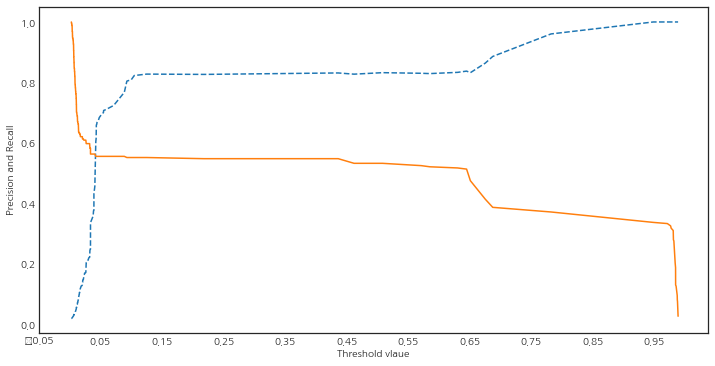

In [554]:
precision_recall_curve_plot(df_test_y, caB_b.predict_proba(df_test_x)[:, 1])

In [556]:
v_feature_name = df_train_x.columns

df_importance =pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']= caB_b.feature_importances_

df_importance.sort_values('Importance',ascending = False , inplace = True)
df_importance.round(3)

,Feature,Importance
0,연령대,19.569
8,남여구분_남자,11.617
15,계약유형_멤버십S,8.847
18,계약유형_통합 패키지,7.524
10,판매유형_렌탈,6.991
9,남여구분_여자,6.442
19,계약유형_프로모션,6.038
17,계약유형_일반,5.412
11,판매유형_멤버십,5.042
20,납부유형_CMS,4.029


# 6.모형 비교

In [349]:
model = ['DecisionTree','RandomForest','GradientBoosing']
train_accuracy =[]
test_accuracy= []
model_f1_score=[]
model_auc = []

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     13620
           1       0.18      0.61      0.27       261

    accuracy                           0.94     13881
   macro avg       0.58      0.78      0.62     13881
weighted avg       0.98      0.94      0.96     13881



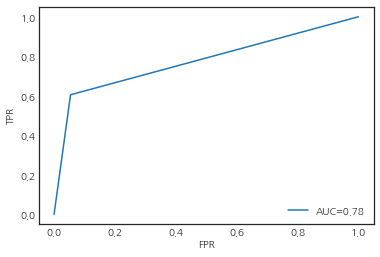

In [350]:
dt_model = DecisionTreeClassifier(min_samples_split = 20, max_depth = 4,random_state= 1234)
dt_model.fit(X_samp,y_samp)

train_accuracy.append(dt_model.score(X_samp, y_samp))
test_accuracy.append(dt_model.score(df_test_x, df_test_y))

y_pred = dt_model.predict(df_test_x)

fpr,tpr,thresholds = roc_curve(df_test_y,y_pred)
roc_auc = auc(fpr,tpr)

model_auc.append(roc_auc)
print(classification_report(df_test_y,y_pred))
plt.plot(fpr,tpr,label = 'AUC=%0.2f'%roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

model_f1_score.append(f1_score(df_test_y,y_pred))

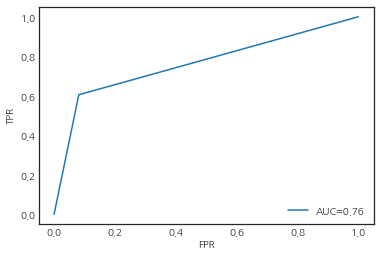

In [351]:
rf_model = RandomForestClassifier(min_samples_split = 20, max_depth = 4,n_estimators=40,random_state= 1234)
rf_model.fit(X_samp, y_samp)

train_accuracy.append(dt_model.score(X_samp, y_samp))
test_accuracy.append(dt_model.score(df_test_x, df_test_y))

y_pred = rf_model.predict(df_test_x)

fpr,tpr,thresholds = roc_curve(df_test_y,y_pred)
roc_auc = auc(fpr,tpr)

model_auc.append(roc_auc)

plt.plot(fpr,tpr,label = 'AUC=%0.2f'%roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

model_f1_score.append(f1_score(df_test_y,y_pred))

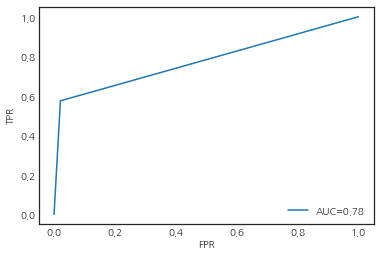

In [352]:
gb_model = GradientBoostingClassifier(min_samples_leaf = 10, max_depth = 4,n_estimators=40,learning_rate = 0.1,random_state= 1234)
gb_model.fit(X_samp,y_samp)

train_accuracy.append(gb_model.score(X_samp, y_samp))
test_accuracy.append(gb_model.score(df_test_x, df_test_y))

y_pred = gb_model.predict(df_test_x)

fpr,tpr,thresholds = roc_curve(df_test_y,y_pred)
roc_auc = auc(fpr,tpr)

model_auc.append(roc_auc)

plt.plot(fpr,tpr,label = 'AUC=%0.2f'%roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

model_f1_score.append(f1_score(df_test_y,y_pred))

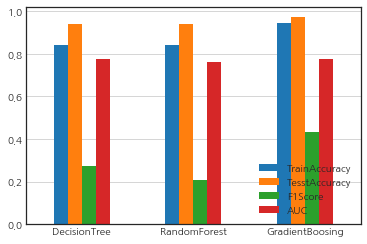

In [353]:
df_eval = pd.DataFrame(index = model)

df_eval['TrainAccuracy'] = train_accuracy
df_eval['TesstAccuracy'] = test_accuracy
df_eval['F1Score'] = model_f1_score
df_eval['AUC'] = model_auc
df_eval.round(3)

df_eval.plot.bar(rot = 0)
plt.legend(loc = 'lower right')
plt.grid(axis = 'y')

# time series

In [88]:
df_time = pd.read_csv('final_personal.csv')
df_time = df_time.drop(['Unnamed: 0'],axis = 1,inplace = False)  

In [93]:
a = df_time['계약일'].value_counts()  # 46000-> 40000
# a.values
# a.index

In [94]:
df1 = pd.DataFrame(a.index, columns=['계약일'])
df2 = pd.DataFrame(a.values, columns=['계약수'])
df = pd.merge(df1, df2, left_index=True, right_index=True)

df_time = pd.merge(df_time ,df, on = ['계약일'],how = 'right')
df_time.head()

,고객ID,고객유형,생년,거주지,시,구군,남여구분,판매유형,계약유형,유통경로,...,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부,연령대,계정수,계약수
0,66758234,개인,1979,경기도,경기도,평택시,여자,렌탈,일반,방문판매,...,96900,계약확정,0,없음,9,새마을금고,정상,30,1,30
1,66755948,개인,1982,경기도,경기도,평택시,남자,렌탈,교체렌탈,방문판매,...,102900,계약확정,0,없음,2,현대카드,정상,30,2,30
2,66756657,개인,1973,경기도,경기도,평택시,여자,렌탈,일반,홈쇼핑,...,96900,계약확정,0,없음,8,우리은행,정상,40,1,30
3,66423450,개인,1982,경기도,경기도,포천시,남자,멤버십,멤버십S,렌탈재계약,...,66900,계약확정,0,없음,5,농협회원조합,정상,30,1,30
4,66423204,개인,1961,경기도,경기도,포천시,남자,멤버십,멤버십S,렌탈재계약,...,66900,해약확정,12,있음,8,농협회원조합,해약,50,1,30


In [95]:
df_time['해약여부'] = np.where(df_time['해약여부'] == '정상', 0,1)

In [96]:
count = []
for i in a.index:
    count.append(sum(df_time[df_time['계약일'] == i]['해약여부']))
    
df1 = pd.DataFrame(a.index, columns=['계약일'])
df2 = pd.DataFrame(count, columns=['해약수']) 
df = pd.merge(df1, df2, left_index=True, right_index=True)

df_time = pd.merge(df_time ,df, on = ['계약일'],how = 'right')
df_time.head()

,고객ID,고객유형,생년,거주지,시,구군,남여구분,판매유형,계약유형,유통경로,...,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부,연령대,계정수,계약수,해약수
0,66758234,개인,1979,경기도,경기도,평택시,여자,렌탈,일반,방문판매,...,계약확정,0,없음,9,새마을금고,0,30,1,30,1
1,66755948,개인,1982,경기도,경기도,평택시,남자,렌탈,교체렌탈,방문판매,...,계약확정,0,없음,2,현대카드,0,30,2,30,1
2,66756657,개인,1973,경기도,경기도,평택시,여자,렌탈,일반,홈쇼핑,...,계약확정,0,없음,8,우리은행,0,40,1,30,1
3,66423450,개인,1982,경기도,경기도,포천시,남자,멤버십,멤버십S,렌탈재계약,...,계약확정,0,없음,5,농협회원조합,0,30,1,30,1
4,66423204,개인,1961,경기도,경기도,포천시,남자,멤버십,멤버십S,렌탈재계약,...,해약확정,12,있음,8,농협회원조합,1,50,1,30,1


In [98]:
df_time = df_time.drop_duplicates(['계약일'])

In [101]:
df_time['계약일'] = pd.to_datetime(df_time['계약일'])

In [102]:
df_time.set_index('계약일',inplace = True)

In [103]:
df_time

,고객ID,고객유형,생년,거주지,시,구군,남여구분,판매유형,계약유형,유통경로,...,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부,연령대,계정수,계약수,해약수
계약일,,,,,,,,,,,,,,,,,,,,,
2014-10-20,66758234,개인,1979,경기도,경기도,평택시,여자,렌탈,일반,방문판매,...,계약확정,0,없음,9,새마을금고,0,30,1,30,1
2014-12-09,66755948,개인,1982,경기도,경기도,평택시,남자,렌탈,프로모션,방문판매,...,계약확정,0,없음,2,현대카드,0,30,2,555,4
2014-10-21,66422449,개인,1970,경기도,경기도,가평군,여자,멤버십,멤버십S,렌탈재계약,...,계약확정,0,없음,1,농협중앙회,0,40,1,581,12
2014-10-25,66757967,개인,1984,경상도,경상도,거제시,여자,렌탈,프로모션,방문판매,...,계약확정,0,없음,5,롯데카드,0,30,2,759,8
2014-10-30,66757441,개인,1966,경기도,인천광역시,계양구,남자,렌탈,프로모션,방문판매,...,계약확정,0,없음,7,신협중앙회,0,40,2,511,2
2015-01-31,66426523,개인,1970,경기도,경기도,고양시 일산동구,남자,렌탈,프로모션,방문판매,...,계약확정,0,없음,6,국민카드,0,40,3,564,15
2014-12-27,66437196,개인,1977,전라도,광주광역시,광산구,여자,멤버십,멤버십S,렌탈재계약,...,계약확정,0,없음,2,광주은행,0,30,2,524,8
2014-10-23,66466141,개인,1976,서울특별시,서울특별시,구로구,여자,렌탈,프로모션,방문판매,...,계약확정,0,없음,6,국민은행,0,30,2,613,6
2014-10-22,66758648,개인,1976,서울특별시,서울특별시,구로구,여자,렌탈,통합 패키지,하이마트,...,계약확정,0,없음,1,삼성카드,0,30,2,722,21


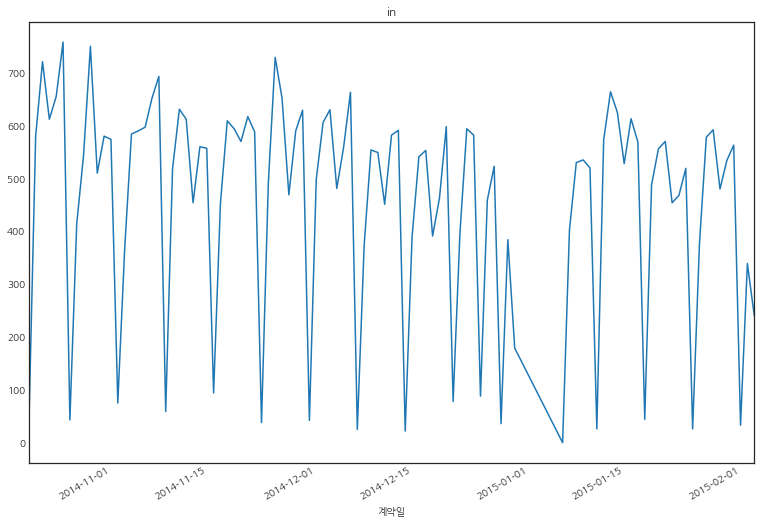

In [85]:
a = df_time['계약수'].plot(title='in')
fig = a.get_figure()
fig.set_size_inches(13,9)

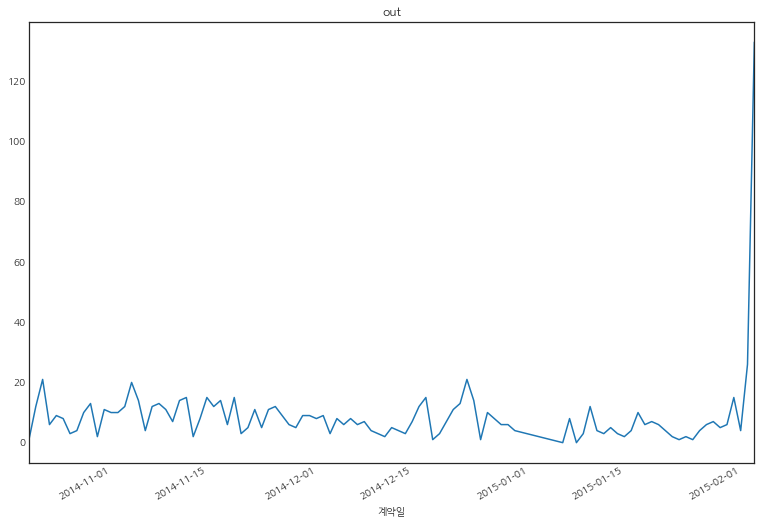

In [133]:
a = df_time['해약수'].plot(title='out')
fig = a.get_figure()
fig.set_size_inches(13,9)
# 2/3